## Imports and Loads

### Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import numpy as np
import re 
import statsmodels.api as sm



### Load Data

In [27]:
path_to_Movies = "Data/Edited_new/Movies.csv"
path_to_Characters = 'Data/Edited_new/Marvel_Characters_.csv'
path_to_ScreenTime = 'Data/Edited_new/ScreenTime_.csv'

movies_df = pd.read_csv(path_to_Movies)
characters_df= pd.read_csv(path_to_Characters)
screentime_df = pd.read_csv(path_to_ScreenTime)

def convert_to_minutes(time_str):
    # Handle placeholder or invalid values
    if not re.match(r"^[\d:]+$", time_str):
        return np.nan  # Return NaN for invalid formats like 'x:00'

    # Add a default '0:' for cases like ':45' (assumes 0 minutes)
    if time_str.startswith(":"):
        time_str = "0" + time_str

    # Match formats explicitly using regex
    if re.match(r"^\d+:\d+:\d+$", time_str):  # min:sec:ms
        minutes, seconds, milliseconds = map(int, time_str.split(":"))
        total_minutes = minutes + seconds / 60 + milliseconds / 60000
    elif re.match(r"^\d+:\d+$", time_str):  # min:sec or sec:ms
        parts = list(map(int, time_str.split(":")))
        if len(parts) == 2 and parts[0] < 60:  # Treat as min:sec if the first part is < 60
            minutes, seconds = parts
            total_minutes = minutes + seconds / 60
        else:  # Treat as sec:ms if the first part is >= 60
            seconds, milliseconds = parts
            total_minutes = seconds / 60 + milliseconds / 60000
    else:
        return np.nan  # Return NaN for anything unexpected
    
    return round(total_minutes, 4)  # Round to 4 decimal places

# Apply the conversion

# Apply the function to the screen_time column
screentime_df['screen_time'] = screentime_df['screen_time'].apply(convert_to_minutes)


# Merging the datasets to create a comprehensive DataFrame
merged_df = pd.merge(screentime_df, movies_df, on='Movie_ID', how='inner')
merged_df = pd.merge(merged_df, characters_df, on='Character_ID', how='inner')
merged_df = merged_df.drop(columns=["Unnamed: 0"])
merged_df.reset_index(inplace=False)
merged_df.head()
merged_df.to_csv("Data/Edited_New/merged.csv")

# # Extracting the release year from the movies dataset
# movies_df['Release_Year'] = pd.to_datetime(movies_df['Release']).dt.year  # Adjusted to match 'Release' column in Movies table

# # Merging characters and movies to link year and characters
# characters_df = pd.merge(characters_df, screentime_df, on='Character_ID', how='left')
# characters_df = characters_df.drop(columns=["Unnamed: 0_y", "Unnamed: 0_x"])

# characters_df = pd.merge(characters_df, movies_df[['Movie_ID', 'Release_Year']], on='Movie_ID', how='left')



# # print(characters_df.dtypes)
# print(characters_df["APPEARANCES"].nunique())
# print(characters_df["APPEARANCES"].isna().sum())

### Coloring

In [28]:

import random
import seaborn as sns

# Define the color groups
Blues = [
    (0.5, 0.7, 0.9),  # Pastel blue
    (0.6, 0.8, 0.9),  # Light pastel blue
    (0.4, 0.6, 0.8),  # Deep pastel blue
    (0.7, 0.85, 0.95),  # Sky pastel blue
    (0.3, 0.5, 0.7),   # Cool pastel blue
    (0.55, 0.75, 0.85),  # Cloudy pastel blue
    (0.45, 0.65, 0.85),  # Ocean pastel blue
    (0.38, 0.58, 0.78),  # Subtle pastel blue
    (0.48, 0.68, 0.88),  # Misty pastel blue
    (0.6, 0.78, 0.92),  # Calm pastel blue
    (0.5, 0.73, 0.85)   # Soft sky pastel blue
]

Purples = [
    (0.8, 0.6, 0.9),  # Pastel purple
    (0.7, 0.5, 0.8),  # Light pastel purple
    (0.9, 0.7, 1.0),  # Soft lavender
    (0.85, 0.65, 0.95),  # Subtle pastel purple
    (0.75, 0.55, 0.85),  # Dreamy pastel purple
    (0.92, 0.72, 0.98),  # Lilac pastel purple
    (0.78, 0.58, 0.88),  # Light orchid purple
    (0.82, 0.62, 0.92),  # Lavender blush pastel purple
    (0.88, 0.68, 0.96),  # Light violet pastel purple
    (0.83, 0.63, 0.9),  # Soft amethyst pastel purple
    (0.9, 0.75, 0.97)   # Blooming pastel purple
]

Pinks = [
    (224/255, 31/255, 137/255),  # Vibrant pink
    (231/255, 72/255, 161/255),  # Medium pink
    (243/255, 165/255, 208/255),  # Light pink
    (1.0, 0.8, 0.9),  # Cotton candy pink
    (0.95, 0.7, 0.85),  # Blush pink
    (0.98, 0.75, 0.88),  # Rose quartz pastel pink
    (0.96, 0.68, 0.8),  # Soft coral pastel pink
    (0.94, 0.6, 0.75),  # Pastel bubblegum pink
    (0.97, 0.77, 0.87),  # Sakura pastel pink
    (0.92, 0.65, 0.8),  # Light raspberry pastel pink
    (0.89, 0.58, 0.72)   # Dusky pastel pink
]


# Combine into a larger palette
extended_pastel_palette = Blues + Purples + Pinks

# Function to pick a random shade from a group
def random_shade(color_group):
    return random.choice(color_group)

# Function to pick a random pastel shade
def random_pastel_shade():
    return random.choice(extended_pastel_palette)

def random_purple_shade():
    return random.choice(Purples)

def random_blue_shade():
    return random.choice(Blues)

def random_pink_shade():
    return random.choice(Pinks)

# Function to pick a random pastel shade
def random_pastel_shade():
    return random.choice(extended_pastel_palette)
# Example of setting a seaborn palette with random colors
def set_random_palette():
    random_palette = [
        random_shade(Blues),
        random_shade(Purples),
        random_shade(Pinks)
    ]
    sns.set_palette(random_palette)
    return random_palette

# Example usage
selected_palette = set_random_palette()
print("Selected Random Palette:", selected_palette)
my_palette = Blues + Purples + Pinks


Selected Random Palette: [(0.5, 0.73, 0.85), (0.7, 0.5, 0.8), (0.95, 0.7, 0.85)]


## Visuallize

##### Question 1: Connection between Year and Number of GM Characters 


In [29]:
# # Counting the number of unique characters per year
# _df = pd.merge(characters_df,merged_df[["Character_ID","Release_Year"]],on="Character_ID")
# print(_df.head())
# characters_per_year = _df.groupby('Release_Year')['GSM'].nunique()

# # Bar Plot: Number of GM Characters per Year
# plt.figure(figsize=(10, 6))
# sns.barplot(x=characters_per_year.index, y=characters_per_year.values, palette=my_palette(characters_per_year.index.tolist()))
# plt.title('Number of GM Characters per Year', fontsize=14, color="black")
# plt.xlabel('Year', fontsize=12, color="black")
# plt.ylabel('Number of Characters', fontsize=12, color="black")
# plt.xticks(rotation=45, color="black")
# plt.yticks(color="black", fontsize=8)
# plt.show()

# # Line Plot: Evolution of GM Characters over Years
# plt.figure(figsize=(10, 6))
# plt.plot(characters_per_year.index, characters_per_year.values, marker='o', linestyle='-', color=purple_shade)
# plt.title('Evolution of GM Characters Over the Years', fontsize=14, color="black")
# plt.xlabel('Year', fontsize=12, color="black")
# plt.ylabel('Number of Characters', fontsize=12, color="black")
# plt.grid()
# plt.xticks(color="black", fontsize=10)
# plt.yticks(color="black", fontsize=7)
# plt.show()


#### Question 2: Connection Between Power Features and Gender

In [30]:
characters_df["Gender"].replace("Female Characters","Female", inplace=True)
characters_df["Gender"].replace("Male Characters","Male", inplace=True)
characters_df["Gender"].replace("Genderfluid Characters", "-", inplace=True)
characters_df["Gender"].replace("Agender Characters","-", inplace=True)
characters_df["Gender"].fillna("-",inplace=True)


# ---------------- Question 2: Connection Between Power Features and Gender ----------------
_df = characters_df.copy()
_df = _df[_df['Gender'] != '-']

cols = ['Speed', 'Strength', 'Intelligence', 'Durability', 'Combat', "Total"]  # Column names adjusted
_df = _df.dropna(subset=cols)
for col in cols:
    _df[col] = _df[col].replace(to_replace="False", value=0)
    _df[col] = _df[col].astype(float)
    

# Describe statistics for each gender
gender_stats = pd.DataFrame(_df.groupby("Gender").describe())
gender_stats.head()

# # Box Plot: Distribution of power features by gender
# for feature in cols:  # Column names adjusted
#     plt.figure(figsize=(10, 9))
#     sns.boxplot(data=_df, x='Gender', y=feature, palette=selected_palette)
#     plt.title(f'Distribution of {feature} by Gender', fontsize=14, color="black")
#     plt.xlabel('Gender', fontsize=12, color="black")
#     plt.ylabel(feature, fontsize=12, color="black")
#     plt.yticks(color="black", fontsize=8)
#     plt.xticks(rotation=90, color="black")
#     plt.show()

# # Violin Plot: Density and distribution of power features by gender
# # for feature in ['Speed', 'Strength', 'Intelligence_x', 'Durability_x', 'Combat']:  # Column names adjusted
#     plt.figure(figsize=(10, 9))
#     sns.violinplot(data=_df, x='Gender', y=feature, palette=[blue_shade, purple_shade])
#     plt.title(f'Violin Plot of {feature} by Gender', fontsize=14, color="black")
#     plt.xlabel('Gender', fontsize=12, color="black")
#     plt.ylabel(feature, fontsize=12, color="black")
#     plt.xticks(color="black")
#     plt.yticks(color="black", fontsize=8)
#     plt.show()




/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_7710/3323688970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  characters_df["Gender"].replace("Female Characters","Female", inplace=True)
/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_7710/3323688970.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

Character_ID                                                           \
              count        mean         std  min    25%    50%    75%    max   
Gender                                                                         
Female        107.0  201.168224  107.422503  4.0  107.5  217.0  296.5  372.0   
Male          241.0  183.307054  108.944276  1.0   92.0  180.0  272.0  373.0   

       Height              ... APPEARANCES          Year               \
        count        mean  ...         75%     max count         mean   
Gender                     ...                                          
Female  107.0  140.140187  ...       206.5   881.0  12.0  1973.833333   
Male    241.0  154.529046  ...       306.0  1137.0  21.0  1974.714286   

                                                            
              std     min      25%     50%     75%     max  
Gender                                                      
Female  13.617057  1953.0  1963.75  1974.0  1981.0  2004.0  
Male    12.665476  1949.0  1967.00  1973.0  1977.0  2005.0  

[2 rows x 96 columns]

##### All Together


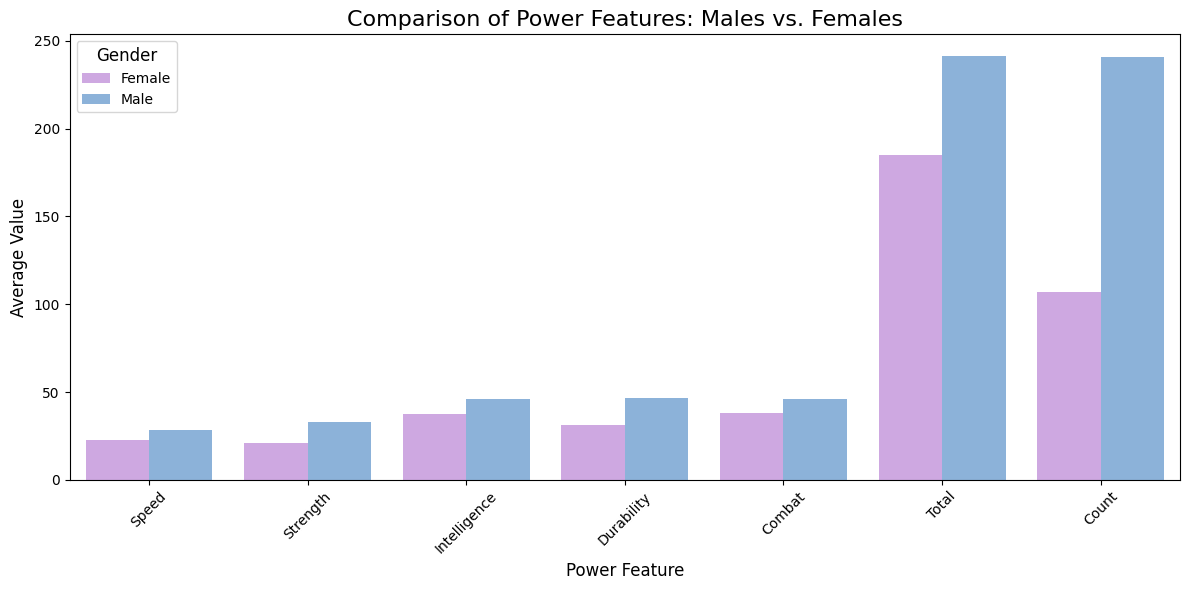

In [31]:

# Filter the data to exclude rows where Gender is "-"
# filtered_characters_df = characters_df[characters_df['Gender'] != '-']

# Select the relevant features and calculate the mean for each gender
# power_features = ['Speed', 'Strength', 'Intelligence_x', 'Durability_x', 'Combat']
gender_means = _df.groupby('Gender')[cols].mean()
gender_means["Count"] =  _df.groupby('Gender')["Gender"].count()

# Reset the index for easier plotting
gender_means = gender_means.reset_index()

# Plotting the grouped bar plot
plt.figure(figsize=(12, 6))
gender_means_melted = gender_means.melt(id_vars='Gender', var_name='Feature', value_name='Average Value')
gender_means_melted

gender_means.head()
sns.barplot(data=gender_means_melted, x='Feature', y='Average Value', hue='Gender', palette=[random_purple_shade(),random_blue_shade()])
plt.title('Comparison of Power Features: Males vs. Females', fontsize=16)
plt.xlabel('Power Feature', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

#### Question 3: Connection Between Superpowers and ScreenTime


/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_7710/1907071027.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=screen_time_mean, x='HasPower', y='Average_ScreenTime', palette=[Blues[0], Purples[0]])


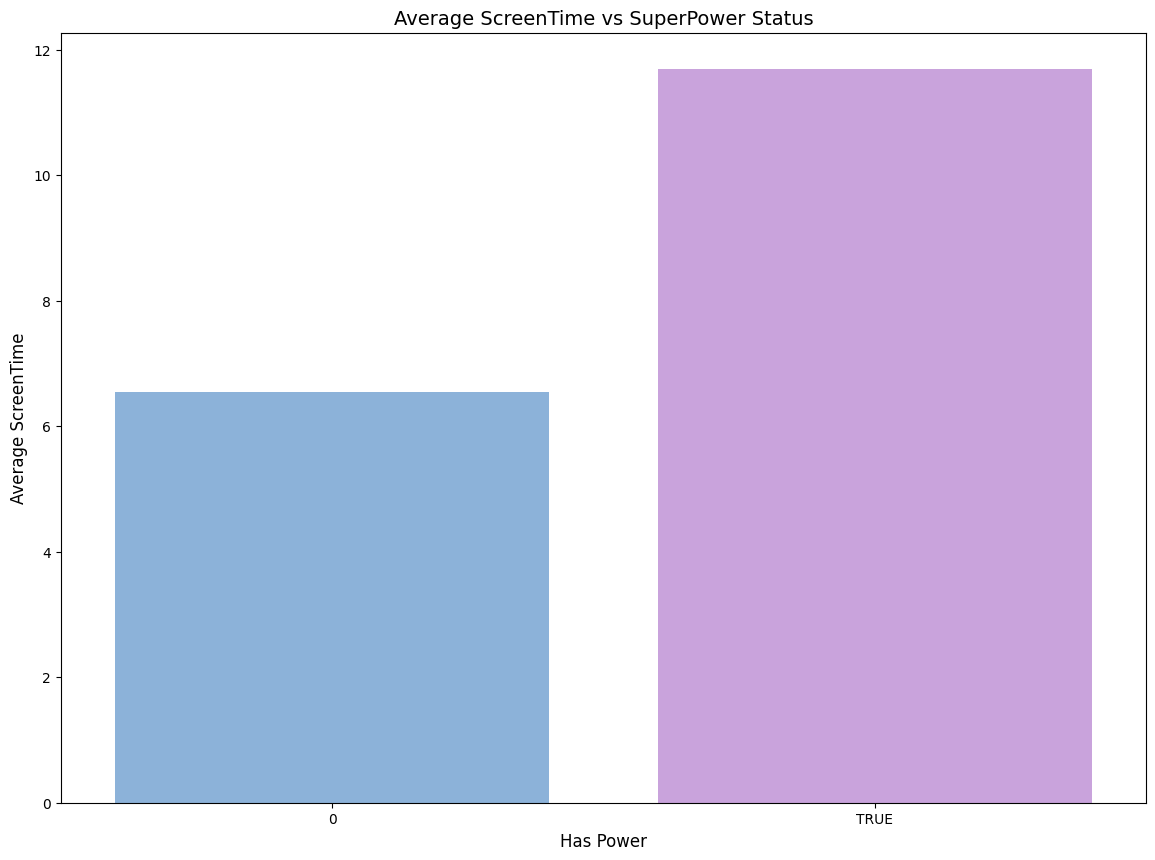

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_7710/1907071027.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  power_screen_df["Gender"].replace("Agender Characters","-", inplace=True)
/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_7710/1907071027.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

['Dormammu' 'Ego' 'Gamora' 'Groot' 'Loki' 'Nick Fury' 'Ronin' 'Sif'
 'Thanos' 'Thor' 'Ultron' 'Vision' 'Tony Stark' 'Pepper Potts'
 'Dr. Bruce Banner' 'Natasha Romanoff' 'Peter Parker' 'Steve Rogers'
 'Peter Quill' 'Scott Lang' 'Dr. Stephen Strange' 'Carol Danvers']


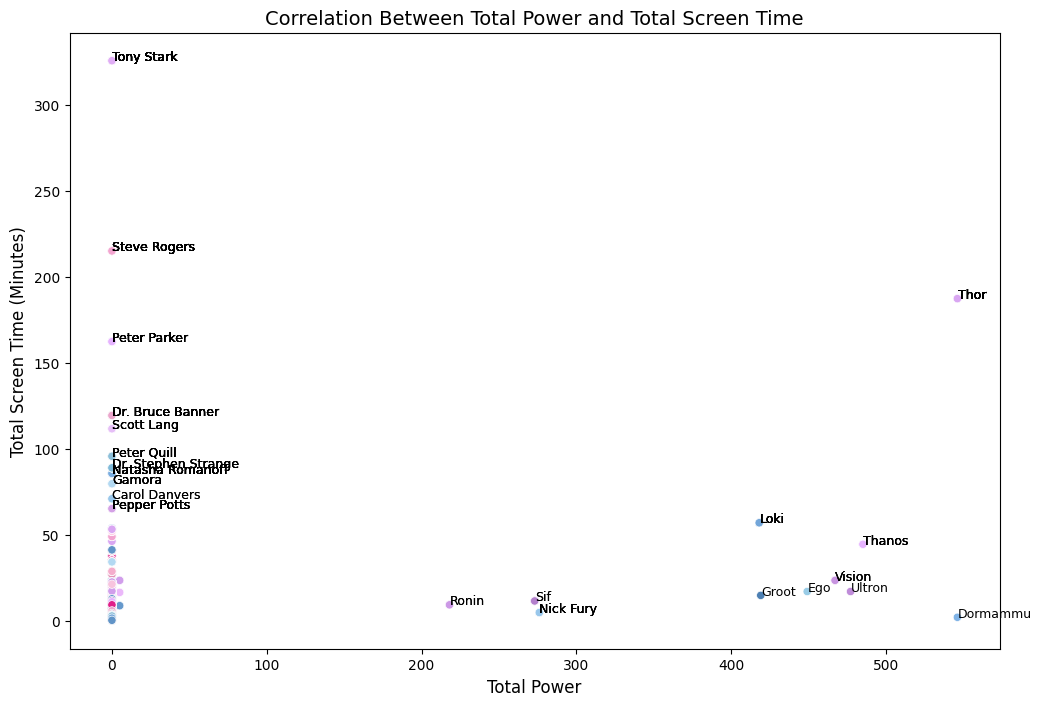

In [32]:
_df = merged_df.copy()
_df["APPEARANCES"] = _df["APPEARANCES"].dropna()
_df["APPEARANCES"] = _df["APPEARANCES"].replace(to_replace="False", value=0)
_df["APPEARANCES"] = _df["APPEARANCES"].astype(float)

_df['HasPower'] = _df['HasPower'].fillna(0)
_df["HasPower"] = _df["HasPower"].replace(to_replace="0", value=0)


merged_df["Total"] = merged_df["Total"].fillna(0)
merged_df['screen_time'] = merged_df['screen_time'].dropna()

screen_time_summary = merged_df.groupby('Character_ID')['screen_time'].sum().reset_index()
screen_time_summary.rename(columns={'screen_time': 'Total_ScreenTime'}, inplace=True)
screen_time_mean = merged_df.groupby("HasPower")["screen_time"].mean().reset_index()
screen_time_mean.rename(columns={'screen_time': 'Average_ScreenTime'}, inplace=True)
power_screen_df = screen_time_summary.merge(merged_df[['Character_ID', 'Total', 'HasPower','Name', 'Gender']], on='Character_ID', how='left')



# Bar Plot: ScreenTime by superpower status
plt.figure(figsize=(14, 10))
sns.barplot(data=screen_time_mean, x='HasPower', y='Average_ScreenTime', palette=[Blues[0], Purples[0]])
plt.title('Average ScreenTime vs SuperPower Status', fontsize=14, color="black")
plt.xlabel('Has Power', fontsize=12, color="black")
plt.ylabel('Average ScreenTime', fontsize=12, color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()




# Filter data to label specific outliers or clusters

power_screen_df["Gender"].replace("Agender Characters","-", inplace=True)
power_screen_df["Gender"].fillna("-",inplace=True)

outliers = power_screen_df[(power_screen_df['Total'] > 200) | (power_screen_df['Total_ScreenTime'] > 55)]
outliers_characters = outliers["Name"].unique()
print(outliers_characters)

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=power_screen_df, y='Total_ScreenTime', x='Total', hue='Name', palette=my_palette, legend=False)
# Add labels for outliers
for i, row in outliers.iterrows():
    if row["Total"] == 0:
        plt.text(row['Total'] + 0.1, row['Total_ScreenTime'] + 0.1, row['Name'],fontsize=9, color='black')
                #  rotation=90, ha='right', va='bottom', fontsize=9, color='black')
    else:
        plt.text(row['Total'] + 0.1, row['Total_ScreenTime'] + 0.15, row['Name'], fontsize=9, color="black")

# Titles and labels
plt.title('Correlation Between Total Power and Total Screen Time', fontsize=14, color='black')
plt.ylabel('Total Screen Time (Minutes)', fontsize=12, color='black')
plt.xlabel('Total Power', fontsize=12, color='black')
plt.xticks(color='black')
plt.yticks(color='black')

# Add legend
# plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.show()


#### Question 4: Connection Between Villain Screen Time and Movie Success

In [33]:
# ---------------- Question 4: Connection Between Villain Screen Time and Movie Success ----------------

# Filtering villains and merging with movie data for context
merged_df = merged_df.dropna(subset=["Movie_ID","Alignment","IMDB rating","metascore","screen_time"])
# characters_df_["Movie_ID"] = characters_df_["Movie_ID"].astype(int)
merged_df["Name"]


# Scatter Plot: Screen time of villains vs. IMDB rating
plt.figure(figsize=(10, 9))
sns.scatterplot(data=merged_df, x='screen_time', y='IMDB rating', hue='Alignment', palette=[blue_shade, purple_shade,"blue"])
plt.title('Villain Screen Time vs. IMDB Rating', fontsize=14, color="black")
plt.xlabel('Screen Time (minutes)', fontsize=12, color="black")
plt.ylabel('IMDB Rating', fontsize=12, color="black")
plt.xticks(color="black", rotation=90)
plt.yticks(color="black", fontsize=8)
plt.show()

# Group by Movie_ID and Alignment, then calculate average screen time
avg_screentime = merged_df.groupby(['Movie_ID', 'Alignment'])['screen_time'].mean().reset_index()

# Pivot the table to have alignments as columns
avg_screentime_pivot = avg_screentime.pivot(index='Movie_ID', columns='Alignment', values='screen_time').reset_index()

# Merge with movie ratings
movies_avg_screentime = pd.merge(movies_df, avg_screentime_pivot, on='Movie_ID', how='left')
movies_avg_screentime.rename(columns={
    'Good Character': 'Avg_ScreenTime_Good',
    'Bad Character': 'Avg_ScreenTime_Bad',
    'Neutral Characters': 'Avg_ScreenTime_Neutral'
}, inplace=True)

# Calculate correlation for each alignment
good_corr = movies_avg_screentime['Avg_ScreenTime_Good'].corr(movies_avg_screentime['IMDB rating'])
bad_corr = movies_avg_screentime['Avg_ScreenTime_Bad'].corr(movies_avg_screentime['IMDB rating'])
neutral_corr = movies_avg_screentime['Avg_ScreenTime_Neutral'].corr(movies_avg_screentime['IMDB rating'])

print(f"Correlation (Good Character Screen Time vs. IMDB Rating): {good_corr}")
print(f"Correlation (Bad Character Screen Time vs. IMDB Rating): {bad_corr}")
print(f"Correlation (Neutral Character Screen Time vs. IMDB Rating): {neutral_corr}")



# Create the scatter plot for both good and bad characters
plt.figure(figsize=(10, 7))

# Plot good characters
plt.scatter(movies_avg_screentime['Avg_ScreenTime_Good'], movies_avg_screentime['IMDB rating'], 
            color=Purples[0], label='Good Characters', alpha=0.7)

# Plot bad characters
plt.scatter(movies_avg_screentime['Avg_ScreenTime_Bad'], movies_avg_screentime['IMDB rating'], 
            color=Blues[0], label='Bad Characters', alpha=0.7)

# Add titles and labels
plt.title('Average Character Screen Time vs. IMDB Rating', fontsize=14)
plt.xlabel('Average Screen Time (Minutes)', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)

# Add legend
plt.legend(title='Character Type', fontsize=10)

# Show the plot
plt.show()




NameError: name 'blue_shade' is not defined

<Figure size 1000x900 with 0 Axes>

#### Question 5 - Screen Time of a Particular Character that Affects Rating/Gross Significantly (or Budget)

##### 1

         Name  Movie_ID  Character_ID  screen_time Movie_Name US release Date  \
0  Tony Stark         1           374        77.25   Iron Man       2 05 2008   
1  Tony Stark         1           374        77.25   Iron Man       2 05 2008   
2  Tony Stark         1           374        77.25   Iron Man       2 05 2008   
3  Tony Stark         1           374        77.25   Iron Man       2 05 2008   
4  Tony Stark         1           374        77.25   Iron Man       2 05 2008   

      Director                  Producer  Duration  \
0  Jon Favreau  Avi Arad and Kevin Feige     126.0   
1  Jon Favreau  Avi Arad and Kevin Feige     126.0   
2  Jon Favreau  Avi Arad and Kevin Feige     126.0   
3  Jon Favreau  Avi Arad and Kevin Feige     126.0   
4  Jon Favreau  Avi Arad and Kevin Feige     126.0   

                        Genre  ...  GSM              ALIVE APPEARANCES  \
0  Action , Adventure, Sci-Fi  ...  NaN  Living Characters         1.0   
1  Action , Adventure, Sci-Fi  ...  NaN 

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_7710/1818929126.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  character_corr = merged_df.groupby('Name').apply(


Correlation Analysis:
                    Budget_df1  IMDB rating  Total Gross  screen_time
Name                                                                 
Abu Bakaar                 NaN          NaN          NaN          NaN
Adrian Toomes              NaN          NaN          NaN          NaN
Agent Brock Rumlow         NaN          NaN          NaN          NaN
Agent Everett Ross         NaN          NaN          NaN          NaN
Agent James Woo            NaN          NaN          NaN          NaN
...                        ...          ...          ...          ...
Yon-Rogg                   NaN          NaN          NaN          NaN
Yondu Udonta               NaN          NaN          NaN          NaN
Zach                       NaN          NaN          NaN          NaN
Zoha                       NaN          NaN          NaN          NaN
Zuri                       NaN          NaN          NaN          NaN

[201 rows x 4 columns]


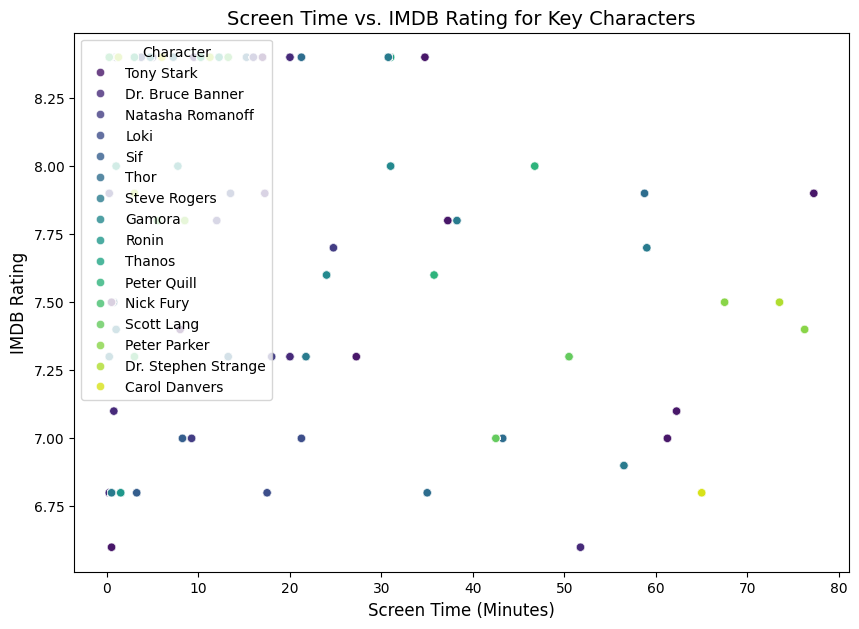

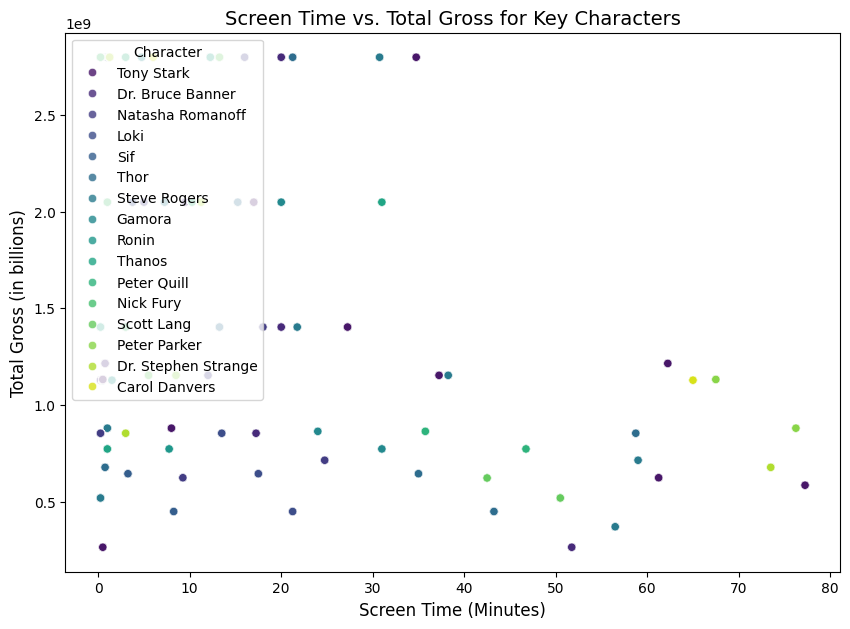

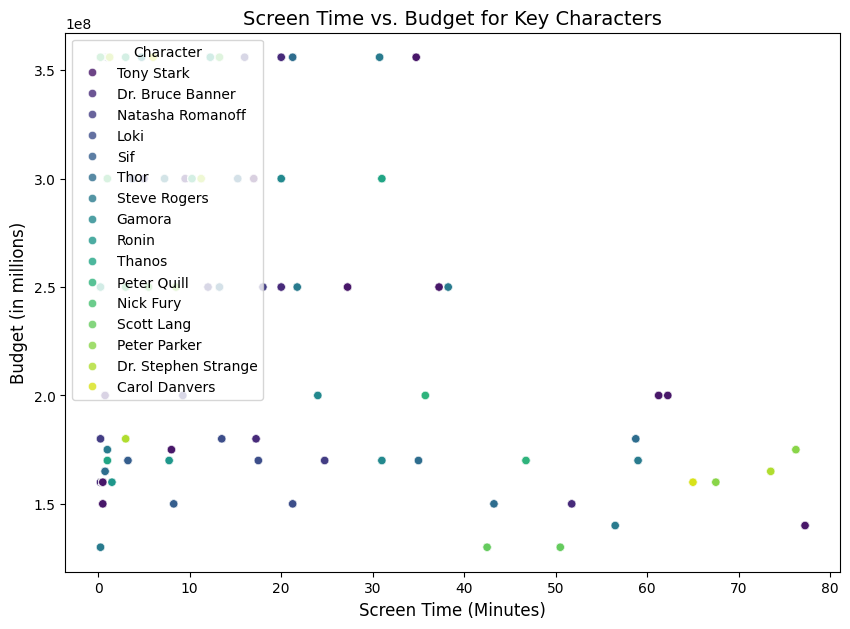

                   Name  IMDB Rating    Budget     Gross
0                Gamora    -0.465673 -0.931119 -0.957437
1                  Loki    -0.920349 -0.970089 -0.952762
2             Nick Fury    -0.844906 -0.788293 -0.873807
3                 Ronin     1.000000  1.000000 -1.000000
4                   Sif     1.000000 -1.000000 -1.000000
5                Thanos     0.484293 -0.067779 -0.113241
6                  Thor    -0.264744 -0.346919 -0.274618
7            Tony Stark     0.103348  0.495719  0.452744
8          Pepper Potts     0.000000  0.000000  0.000000
9      Dr. Bruce Banner     0.295183  0.617528  0.579564
10     Natasha Romanoff     0.080469  0.291814  0.277444
11         Peter Parker    -0.808556 -0.792150 -0.638047
12         Steve Rogers     0.076789  0.141414  0.119794
13          Peter Quill    -0.821642 -0.967331 -0.937450
14           Scott Lang    -0.639975 -0.671703 -0.495936
15  Dr. Stephen Strange    -0.460131 -0.680698 -0.708336
16        Carol Danvers    -1.0

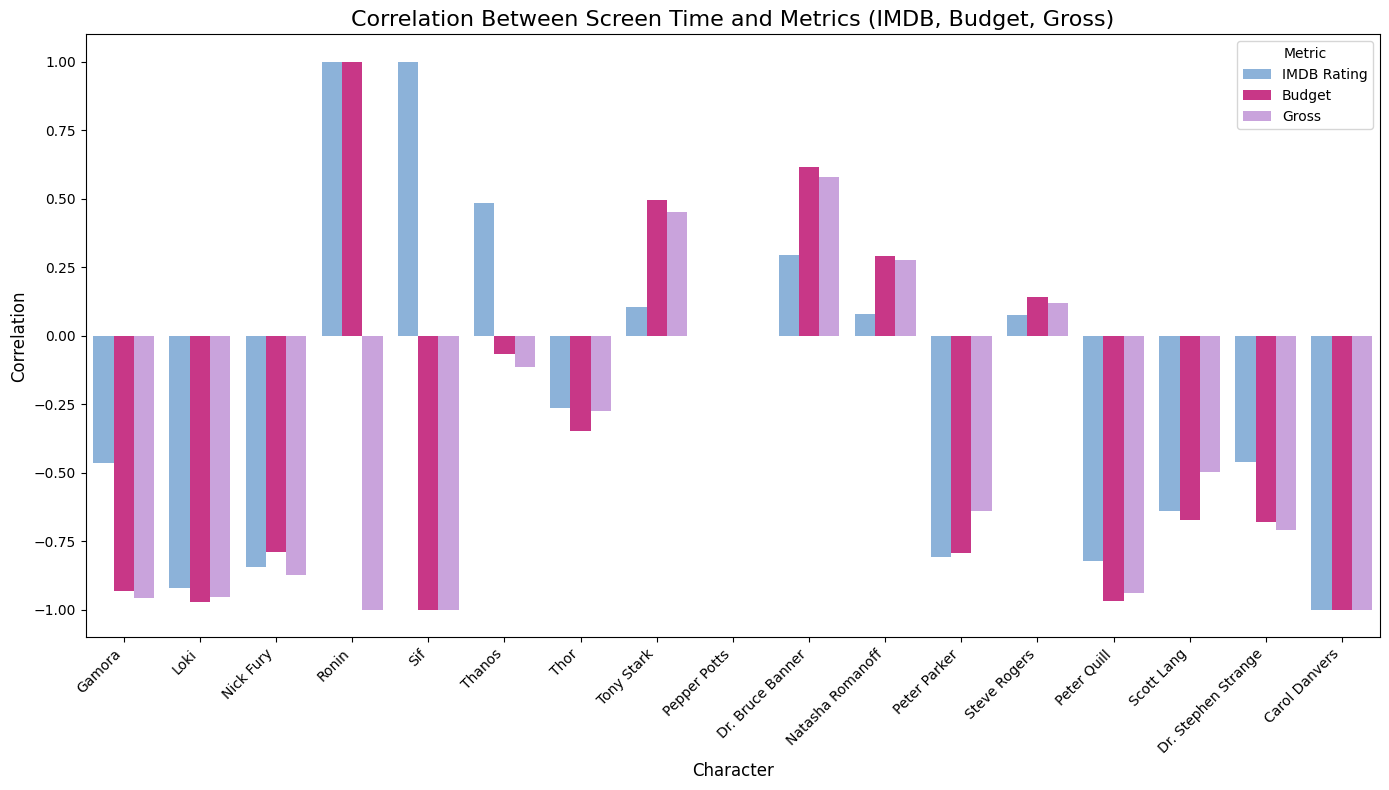

MemoryError: Unable to allocate 839. TiB for an array with shape (115279016387021,) and data type int64

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure merged_df is already prepared as described
# Inspect the structure of merged_df
print(merged_df.head())
print(merged_df.columns)

# Step 1: Filter relevant characters and calculate metrics
key_characters = [
    'Gamora', 'Loki', 'Nick Fury', 
    'Ronin', 'Sif', 'Thanos', 'Thor',
    'Tony Stark', 'Pepper Potts', 'Dr. Bruce Banner', 
    'Natasha Romanoff', 'Peter Parker', 'Steve Rogers', 
    'Peter Quill', 'Scott Lang', 'Dr. Stephen Strange', 'Carol Danvers']


# Create a flag for character presence
merged_df['Character_Present'] = merged_df['Name'].apply(lambda x: x in key_characters)

# Group by Movie_ID and Character presence, calculate average screen time and other metrics
character_impact_stats = merged_df.groupby(['Name', 'Character_Present']).agg({
    'screen_time': 'sum',  # Total screen time per character
    'IMDB rating': 'mean',  # Average IMDB rating for movies they appear in
    'Total Gross': 'mean',  # Average gross for movies they appear in
    'Budget_df1': 'mean',  # Average budget for movies they appear in
}).reset_index()

print(character_impact_stats)

# Step 2: Correlation Analysis
# Correlate screen time with IMDB Rating, Gross, and Budget
character_corr = merged_df.groupby('Name').apply(
    lambda x: x[['screen_time']].corrwith(x[['IMDB rating', 'Total Gross', 'Budget_df1']])
)
print("Correlation Analysis:")
print(character_corr)

# Step 3: Visualizations


# Scatter Plot: Screen Time vs. IMDB Rating
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df[merged_df['Name'].isin(key_characters)], 
                x='screen_time', y='IMDB rating', hue='Name', palette='viridis', alpha=0.8)
plt.title('Screen Time vs. IMDB Rating for Key Characters', fontsize=14)
plt.ylabel('IMDB Rating', fontsize=12)
plt.xlabel('Screen Time (Minutes)', fontsize=12)
plt.legend(title='Character', loc='upper left')
plt.show()

# Scatter Plot: Screen Time vs. Total Gross
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df[merged_df['Name'].isin(key_characters)], 
                x='screen_time', y='Total Gross', hue='Name', palette='viridis', alpha=0.8)
plt.title('Screen Time vs. Total Gross for Key Characters', fontsize=14)
plt.ylabel('Total Gross (in billions)', fontsize=12)
plt.xlabel('Screen Time (Minutes)', fontsize=12)
plt.legend(title='Character', loc='upper left')
plt.show()

# Scatter Plot: Screen Time vs. Budget
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df[merged_df['Name'].isin(key_characters)], 
                x='screen_time', y='Budget_df1', hue='Name', palette='viridis', alpha=0.8)
plt.title('Screen Time vs. Budget for Key Characters', fontsize=14)
plt.ylabel('Budget (in millions)', fontsize=12)
plt.xlabel('Screen Time (Minutes)', fontsize=12)
plt.legend(title='Character', loc='upper left')
plt.show()


filtered_df = merged_df[merged_df['Name'].isin(key_characters)]

# Initialize an empty dictionary to store correlations
correlations = {'Name': [], 'IMDB Rating': [], 'Budget': [], 'Gross': []}

# Loop through each key character
for character in key_characters:
    char_data = filtered_df[filtered_df['Name'] == character]
    
    # Calculate correlations (skip if not enough data)
    if len(char_data) > 1:
        imdb_corr = char_data['screen_time'].corr(char_data['IMDB rating'])
        budget_corr = char_data['screen_time'].corr(char_data['Budget_df1'])
        gross_corr = char_data['screen_time'].corr(char_data['Total Gross'])
    else:
        imdb_corr = budget_corr = gross_corr = None  # Not enough data
    
    # Append results to dictionary
    correlations['Name'].append(character)
    correlations['IMDB Rating'].append(imdb_corr if imdb_corr is not None else 0)
    correlations['Budget'].append(budget_corr if budget_corr is not None else 0)
    correlations['Gross'].append(gross_corr if gross_corr is not None else 0)

# Convert correlations dictionary to DataFrame
correlation_df = pd.DataFrame(correlations)
print(correlation_df)

# Reshape for grouped bar plot
correlation_df_melted = correlation_df.melt(id_vars='Name', var_name='Metric', value_name='Correlation')

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=correlation_df_melted, x='Name', y='Correlation', hue='Metric', palette=[Blues[0], Pinks[0],Purples[0]])

# Add titles and labels
plt.title('Correlation Between Screen Time and Metrics (IMDB, Budget, Gross)', fontsize=16)
plt.xlabel('Character', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()



#### NORMALIZED 



# Include zero screen time for movies where a character does not appear
characters_movies = merged_df[['Name', 'Movie_ID']].drop_duplicates()
all_combinations = pd.merge(characters_movies, merged_df[['Movie_ID']], on='Movie_ID', how='outer')
merged_df = pd.merge(all_combinations, merged_df, on=['Name', 'Movie_ID'], how='left')
merged_df['screen_time'] = merged_df['screen_time'].fillna(0)  # Zero screen time for missing entries

# Calculate correlations per movie
correlation_results = {'Character': [], 'IMDB Rating': [], 'Budget': [], 'Gross': []}
for character in key_characters:
    char_data = merged_df[merged_df['Name'] == character]
    correlations = {
        'IMDB Rating': [],
        'Budget': [],
        'Gross': [],
    }
    for movie in char_data['Movie_ID'].unique():
        movie_data = char_data[char_data['Movie_ID'] == movie]
        if len(movie_data) > 1:
            correlations['IMDB Rating'].append(movie_data['screen_time'].corr(movie_data['IMDB rating']))
            correlations['Budget'].append(movie_data['screen_time'].corr(movie_data['Budget_df1']))
            correlations['Gross'].append(movie_data['screen_time'].corr(movie_data['Total Gross']))

    # Average the correlations for the character
    correlation_results['Name'].append(character)
    correlation_results['IMDB Rating'].append(np.nanmean(correlations['IMDB Rating']))
    correlation_results['Budget'].append(np.nanmean(correlations['Budget']))
    correlation_results['Gross'].append(np.nanmean(correlations['Gross']))

# Create DataFrame
correlation_df = pd.DataFrame(correlation_results)

plt.figure(figsize=(14, 8))
sns.barplot(data=correlation_df_melted, x='Character', y='Correlation', hue='Metric', palette='coolwarm')
plt.title('Updated Correlation Between Screen Time and Metrics (IMDB, Budget, Gross)', fontsize=16)
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Character', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(-1, 1)  # Ensure proper correlation scale
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()



##### Normalized

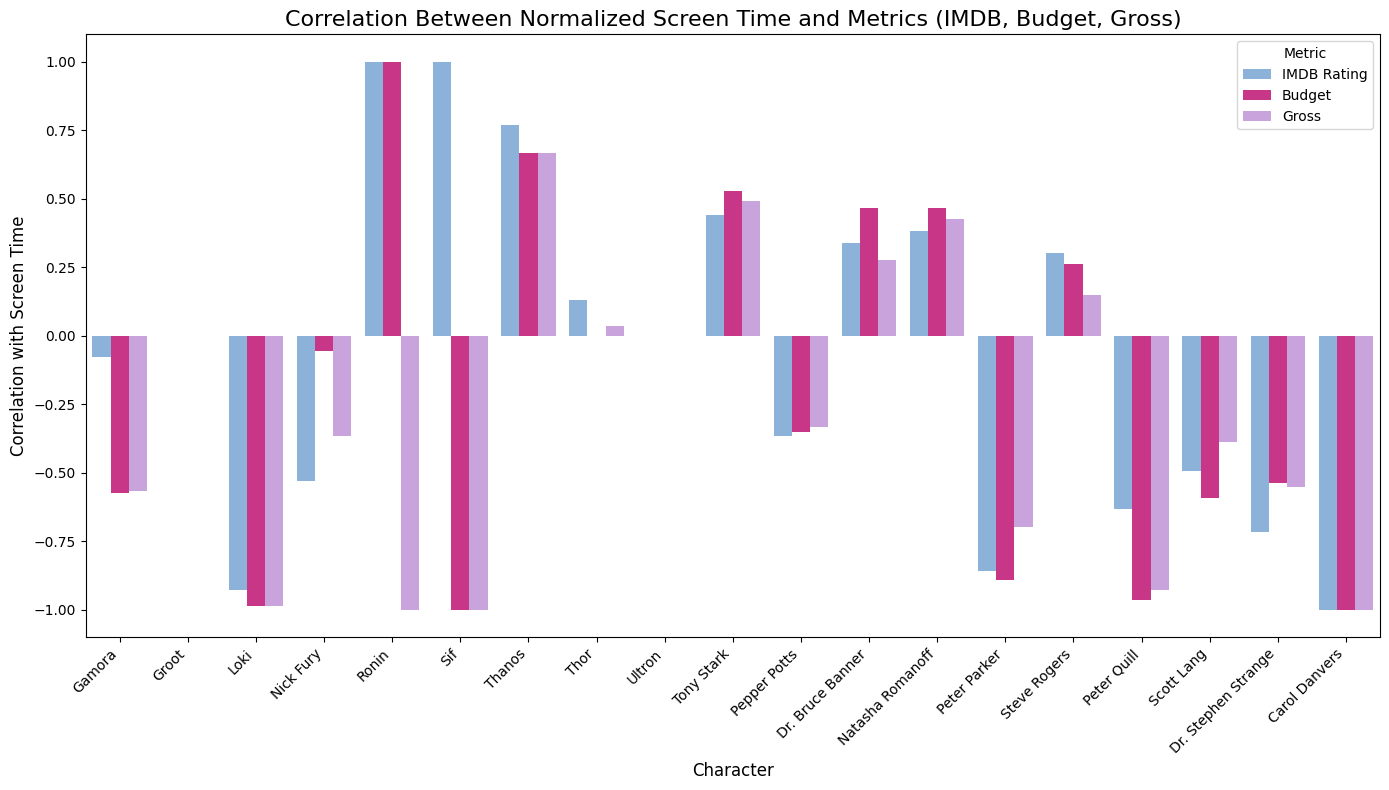

In [ ]:
# Step 1: Normalize Screen Time
def normalize_screen_time(df):
    df['Normalized_ScreenTime'] = df['screen_time'] / df.groupby('Movie_ID')['screen_time'].transform('sum')
    return df

# Step 2: Filter Key Characters
def filter_key_characters(df, key_characters):
    return df[df['Name'].isin(key_characters)]

# Step 3: Calculate Correlations
def calculate_correlations(df, key_characters):
    correlations = {'Character': [], 'IMDB Rating': [], 'Budget': [], 'Gross': []}

    for character in key_characters:
        char_data = df[df['Name'] == character]

        if len(char_data) > 1:
            imdb_corr = char_data['Normalized_ScreenTime'].corr(char_data['IMDB rating'])
            budget_corr = char_data['Normalized_ScreenTime'].corr(char_data['Budget_df1'])
            gross_corr = char_data['Normalized_ScreenTime'].corr(char_data['Total Gross'])
        else:
            imdb_corr = budget_corr = gross_corr = None

        correlations['Character'].append(character)
        correlations['IMDB Rating'].append(imdb_corr if imdb_corr is not None else 0)
        correlations['Budget'].append(budget_corr if budget_corr is not None else 0)
        correlations['Gross'].append(gross_corr if gross_corr is not None else 0)

    return pd.DataFrame(correlations)

# Step 4: Plot Correlations
def plot_correlations(correlation_df):
    correlation_df_melted = correlation_df.melt(id_vars='Character', var_name='Metric', value_name='Correlation')

    plt.figure(figsize=(14, 8))
    sns.barplot(data=correlation_df_melted, x='Character', y='Correlation', hue='Metric',  palette=[Blues[0], Pinks[0],Purples[0]])

    plt.title('Correlation Between Normalized Screen Time and Metrics (IMDB, Budget, Gross)', fontsize=16)
    plt.xlabel('Character', fontsize=12)
    plt.ylabel('Correlation with Screen Time', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.legend(title='Metric', fontsize=10)
    plt.tight_layout()
    plt.show()


# Main Execution
# Replace `merged_df` with your actual DataFrame


# Assume `merged_df` is already defined
merged_df = normalize_screen_time(merged_df)
filtered_df = filter_key_characters(merged_df, key_characters)
correlation_df = calculate_correlations(filtered_df, key_characters)
plot_correlations(correlation_df)


##### Calculate Correlations per Movie and Average


   Movie_ID  Character_ID  screen_time Movie_Name US release Date  \
0         1           374        77.25   Iron Man       2 05 2008   
1         1           375        23.25   Iron Man       2 05 2008   
2         1           376        22.00   Iron Man       2 05 2008   
3         1           377        10.75   Iron Man       2 05 2008   
4         1           378         8.25   Iron Man       2 05 2008   

      Director                  Producer  Duration  \
0  Jon Favreau  Avi Arad and Kevin Feige     126.0   
1  Jon Favreau  Avi Arad and Kevin Feige     126.0   
2  Jon Favreau  Avi Arad and Kevin Feige     126.0   
3  Jon Favreau  Avi Arad and Kevin Feige     126.0   
4  Jon Favreau  Avi Arad and Kevin Feige     126.0   

                        Genre  IMDB rating  ...                ALIVE  \
0  Action , Adventure, Sci-Fi          7.9  ...    Living Characters   
1  Action , Adventure, Sci-Fi          7.9  ...    Living Characters   
2  Action , Adventure, Sci-Fi          7.9  

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_2957/4048711415.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  character_corr = merged_df.groupby('Name').apply(


Correlation Analysis:
                    Budget_df1  IMDB rating  Total Gross  screen_time
Name                                                                 
Aaron Davis                NaN          NaN          NaN          NaN
Abu Bakaar                 NaN          NaN          NaN          NaN
Adrian Toomes              NaN          NaN          NaN          NaN
Agent Brock Rumlow         NaN          NaN          NaN          NaN
Agent Everett Ross         NaN          NaN          NaN          NaN
...                        ...          ...          ...          ...
Yon-Rogg                   NaN          NaN          NaN          NaN
Yondu Udonta               NaN          NaN          NaN          NaN
Zach                       NaN          NaN          NaN          NaN
Zoha                       NaN          NaN          NaN          NaN
Zuri                       NaN          NaN          NaN          NaN

[239 rows x 4 columns]


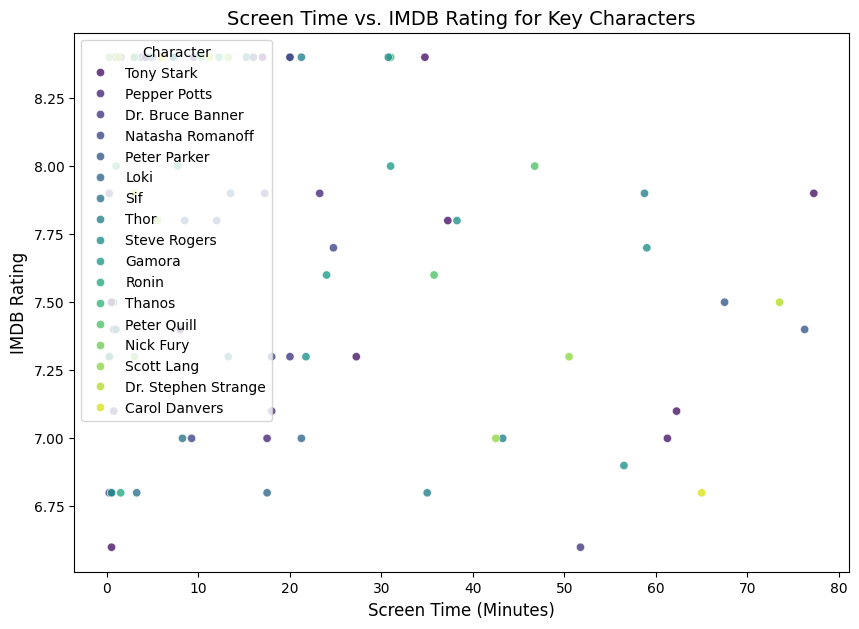

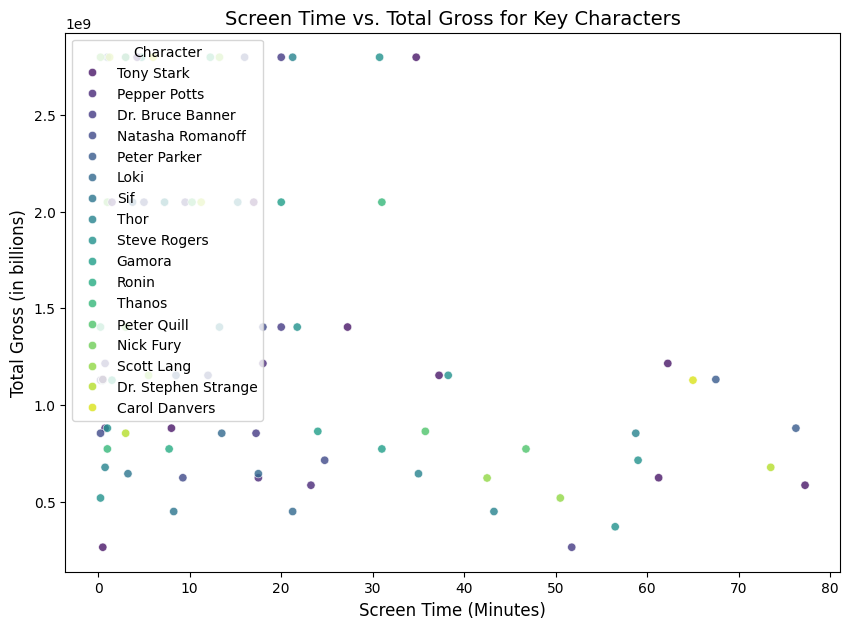

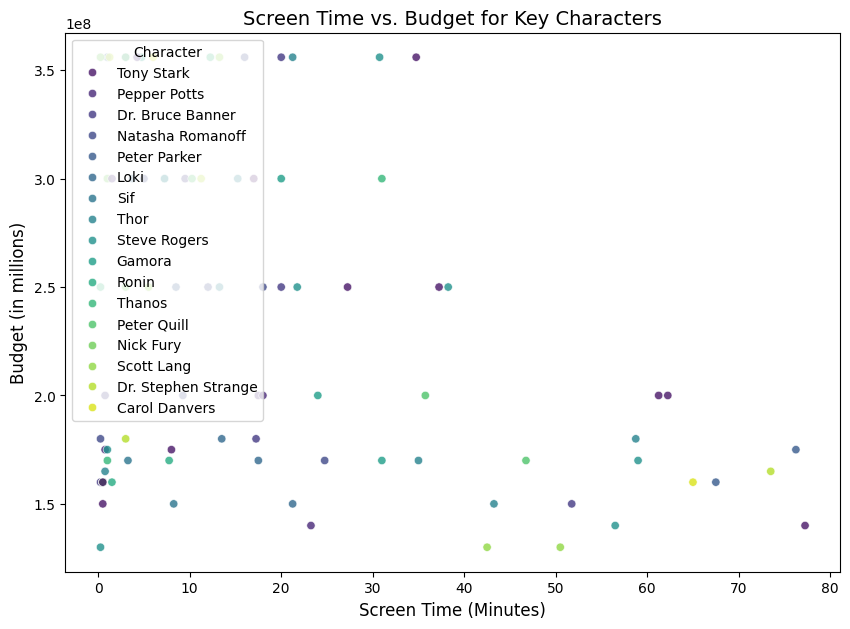

              Character  IMDB Rating    Budget     Gross
0                Gamora    -0.601890 -0.935258 -0.932106
1                  Loki    -0.924294 -0.974199 -0.973843
2             Nick Fury    -0.629879 -0.150563 -0.447104
3                 Ronin     1.000000  1.000000 -1.000000
4                   Sif     1.000000 -1.000000 -1.000000
5                Thanos     0.717337  0.566222  0.556204
6                  Thor    -0.180547 -0.368298 -0.343439
7            Tony Stark     0.092811 -0.025282 -0.079631
8          Pepper Potts    -0.474962 -0.610522 -0.611202
9      Dr. Bruce Banner    -0.227389 -0.150587 -0.379167
10     Natasha Romanoff     0.139292  0.208879  0.075173
11         Peter Parker    -0.877833 -0.903800 -0.723068
12         Steve Rogers     0.062094  0.011250 -0.158985
13          Peter Quill    -0.780976 -0.989744 -0.969363
14           Scott Lang    -0.787724 -0.840200 -0.666886
15  Dr. Stephen Strange    -0.810371 -0.602965 -0.605320
16        Carol Danvers    -1.0

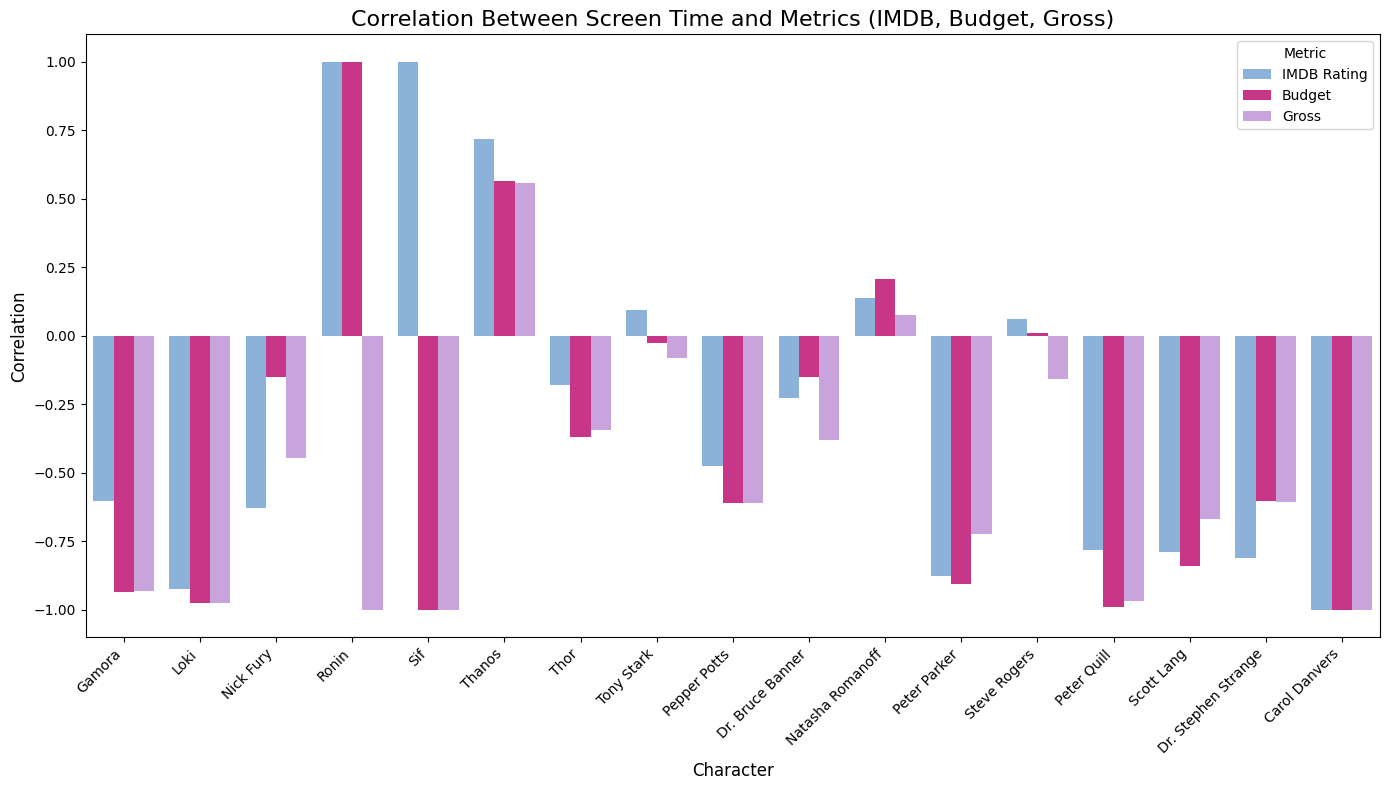

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure merged_df is already prepared as described
# Inspect the structure of merged_df
print(merged_df.head())
print(merged_df.columns)

# Step 1: Filter relevant characters and calculate metrics
key_characters = [
    'Gamora', 'Loki', 'Nick Fury', 
    'Ronin', 'Sif', 'Thanos', 'Thor',
    'Tony Stark', 'Pepper Potts', 'Dr. Bruce Banner', 
    'Natasha Romanoff', 'Peter Parker', 'Steve Rogers', 
    'Peter Quill', 'Scott Lang', 'Dr. Stephen Strange', 'Carol Danvers']


# Create a flag for character presence
merged_df['Character_Present'] = merged_df['Name'].apply(lambda x: x in key_characters)

# Group by Movie_ID and Character presence, calculate average screen time and other metrics
character_impact_stats = merged_df.groupby(['Name', 'Character_Present']).agg({
    'screen_time': 'sum',  # Average screen time rating for movies they appear in
    'IMDB rating': 'mean',  # Average IMDB rating for movies they appear in
    'Total Gross': 'mean',  # Average gross for movies they appear in
    'Budget_df1': 'mean',  # Average budget for movies they appear in
}).reset_index()

print(character_impact_stats)

# Step 2: Correlation Analysis
# Correlate screen time with IMDB Rating, Gross, and Budget
character_corr = merged_df.groupby('Name').apply(
    lambda x: x[['screen_time']].corrwith(x[['IMDB rating', 'Total Gross', 'Budget_df1']])
)
print("Correlation Analysis:")
print(character_corr)

# Step 3: Visualizations


# Scatter Plot: Screen Time vs. IMDB Rating
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df[merged_df['Name'].isin(key_characters)], 
                x='screen_time', y='IMDB rating', hue='Name', palette='viridis', alpha=0.8)
plt.title('Screen Time vs. IMDB Rating for Key Characters', fontsize=14)
plt.ylabel('IMDB Rating', fontsize=12)
plt.xlabel('Screen Time (Minutes)', fontsize=12)
plt.legend(title='Character', loc='upper left')
plt.show()

# Scatter Plot: Screen Time vs. Total Gross
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df[merged_df['Name'].isin(key_characters)], 
                x='screen_time', y='Total Gross', hue='Name', palette='viridis', alpha=0.8)
plt.title('Screen Time vs. Total Gross for Key Characters', fontsize=14)
plt.ylabel('Total Gross (in billions)', fontsize=12)
plt.xlabel('Screen Time (Minutes)', fontsize=12)
plt.legend(title='Character', loc='upper left')
plt.show()

# Scatter Plot: Screen Time vs. Budget
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df[merged_df['Name'].isin(key_characters)], 
                x='screen_time', y='Budget_df1', hue='Name', palette='viridis', alpha=0.8)
plt.title('Screen Time vs. Budget for Key Characters', fontsize=14)
plt.ylabel('Budget (in millions)', fontsize=12)
plt.xlabel('Screen Time (Minutes)', fontsize=12)
plt.legend(title='Character', loc='upper left')
plt.show()


filtered_df = merged_df[merged_df['Name'].isin(key_characters)]

# Initialize an empty dictionary to store correlations
correlations = {'Character': [], 'IMDB Rating': [], 'Budget': [], 'Gross': []}

# Loop through each key character
for character in key_characters:
    char_data = filtered_df[filtered_df['Name'] == character]
    
    # Calculate correlations (skip if not enough data)
    if len(char_data) > 1:
        imdb_corr = char_data['screen_time'].corr(char_data['IMDB rating'])
        budget_corr = char_data['screen_time'].corr(char_data['Budget_df1'])
        gross_corr = char_data['screen_time'].corr(char_data['Total Gross'])
    else:
        imdb_corr = budget_corr = gross_corr = None  # Not enough data
    
    # Append results to dictionary
    correlations['Character'].append(character)
    correlations['IMDB Rating'].append(imdb_corr if imdb_corr is not None else 0)
    correlations['Budget'].append(budget_corr if budget_corr is not None else 0)
    correlations['Gross'].append(gross_corr if gross_corr is not None else 0)

# Convert correlations dictionary to DataFrame
correlation_df = pd.DataFrame(correlations)
print(correlation_df)

# Reshape for grouped bar plot
correlation_df_melted = correlation_df.melt(id_vars='Character', var_name='Metric', value_name='Correlation')

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=correlation_df_melted, x='Character', y='Correlation', hue='Metric', palette=[Blues[0], Pinks[0],Purples[0]])

# Add titles and labels
plt.title('Correlation Between Screen Time and Metrics (IMDB, Budget, Gross)', fontsize=16)
plt.xlabel('Character', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()



#### NORMALIZED 



#### More

##### 1

In [556]:
# Merge screentime and movie data
character_analysis = merged_df.copy()

# Group by Character_ID to calculate correlations
character_correlations = {}

for character_id, group in character_analysis.groupby('Character_ID'):
    correlation = group[['screen_time', 'IMDB rating', 'Total Gross', 'Budget_df1']].corr()
    character_correlations[character_id] = correlation['screen_time'][1:]  # Exclude self-correlation

# Convert to DataFrame
correlation_df = pd.DataFrame(character_correlations).T
correlation_df.columns = ['IMDB_rating_corr', 'Total_Gross_corr', 'Budget_corr']
correlation_df = correlation_df.reset_index().rename(columns={'index': 'Character_ID'})

# Display top characters with the highest correlations
print(correlation_df.sort_values('IMDB_rating_corr', ascending=False).head(10))


# Calculate mean and standard deviation of screen time per character
character_screen_time = character_analysis.groupby('Character_ID')['screen_time'].mean()
character_screen_time_zscore = (character_screen_time - character_screen_time.mean()) / character_screen_time.std()

# Identify outliers (e.g., Z-score > 2)
outliers = character_screen_time_zscore[character_screen_time_zscore > 2]
print("Characters with significantly high screen time:")
print(outliers)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for clustering
clustering_data = character_analysis.groupby('Character_ID')[['screen_time', 'IMDB rating', 'Total Gross', 'Budget_df1']].mean()
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Analyze clusters by calculating the mean of each feature for each cluster
cluster_means = clustering_data.groupby('Cluster')[['screen_time', 'IMDB rating', 'Total Gross', 'Budget_df1']].mean()
print("Cluster Means:")
print(cluster_means)

# Add descriptive labels for each cluster
cluster_labels = {
    0: 'Low Screen Time, Low Impact',
    1: 'High Screen Time, High Gross Revenue',
    2: 'Moderate Screen Time, High Rating Impact'
}
clustering_data['Cluster_Label'] = clustering_data['Cluster'].map(cluster_labels)

# Plot clusters with labels
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=clustering_data,
    x='screen_time',
    y='Total Gross',
    hue='Cluster_Label',
    palette=my_palette',
    alpha=0.8
)
plt.title('Clustering of Characters by Screen Time and Impact')
plt.xlabel('Average Screen Time (minutes)')
plt.ylabel('Total Gross Revenue ($)')
plt.legend(title='Cluster Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Highlight specific characters in the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=clustering_data,
    x='screen_time',
    y='Total Gross',
    hue='Cluster_Label',
    palette=my_palette',
    alpha=0.8
)

# Annotate characters with high impact
for i, row in clustering_data.iterrows():
    if row['Cluster_Label'] == 'High Screen Time, High Gross Revenue':  # Replace with the cluster you want to highlight
        plt.text(row['screen_time'], row['Total Gross'], row.name, fontsize=8)

plt.title('Clustering of Characters by Screen Time and Impact')
plt.xlabel('Average Screen Time (minutes)')
plt.ylabel('Total Gross Revenue ($)')
plt.legend(title='Cluster Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# List characters and their cluster labels
characters_by_cluster = clustering_data.reset_index()[['Character_ID', 'Cluster', 'Cluster_Label']]
characters_by_cluster = pd.merge(merged_df,characters_by_cluster,on="Character_ID")
characters_by_cluster.head()


# Merge character traits into clustering data
character_traits = characters_df[['Character_ID', 'Name', 'Alignment', 'Power', 'APPEARANCES']]
clustering_data = clustering_data.reset_index().merge(character_traits, on='Character_ID', how='left')

# Merge character traits into clustering data
character_traits = characters_df[['Character_ID', 'Name', 'Alignment', 'Power', 'APPEARANCES']]
clustering_data = clustering_data.reset_index().merge(character_traits, on='Character_ID', how='left')

# Summarize traits for each cluster
for cluster, group in clustering_data.groupby('Cluster'):
    print(f"Cluster {cluster}: {cluster_labels[cluster]}")
    print(f"Number of characters: {len(group)}")
    print(f"Average Power: {group['Power'].mean():.2f}")
    print(f"Average Appearances: {group['APPEARANCES'].mean():.2f}")
    print(f"Alignment distribution:\n{group['Alignment'].value_counts()}")
    print("\n")



SyntaxError: unterminated string literal (detected at line 63) (3184688024.py, line 63)

##### 2

Cluster 0: Low Screen Time, Low Impact
Number of characters: 130
Average Power: 28.00
Average Appearances: 99.03
Alignment distribution:
Alignment
Good Character        64
Bad Character         52
Neutral Characters    14
Name: count, dtype: int64


Cluster 1: High Screen Time, High Gross Revenue
Number of characters: 38
Average Power: 28.71
Average Appearances: 267.32
Alignment distribution:
Alignment
Good Character        20
Bad Character         16
Neutral Characters     2
Name: count, dtype: int64


Cluster 2: Moderate Screen Time, High Rating Impact
Number of characters: 33
Average Power: 64.00
Average Appearances: 451.10
Alignment distribution:
Alignment
Bad Character         16
Good Character        16
Neutral Characters     1
Name: count, dtype: int64




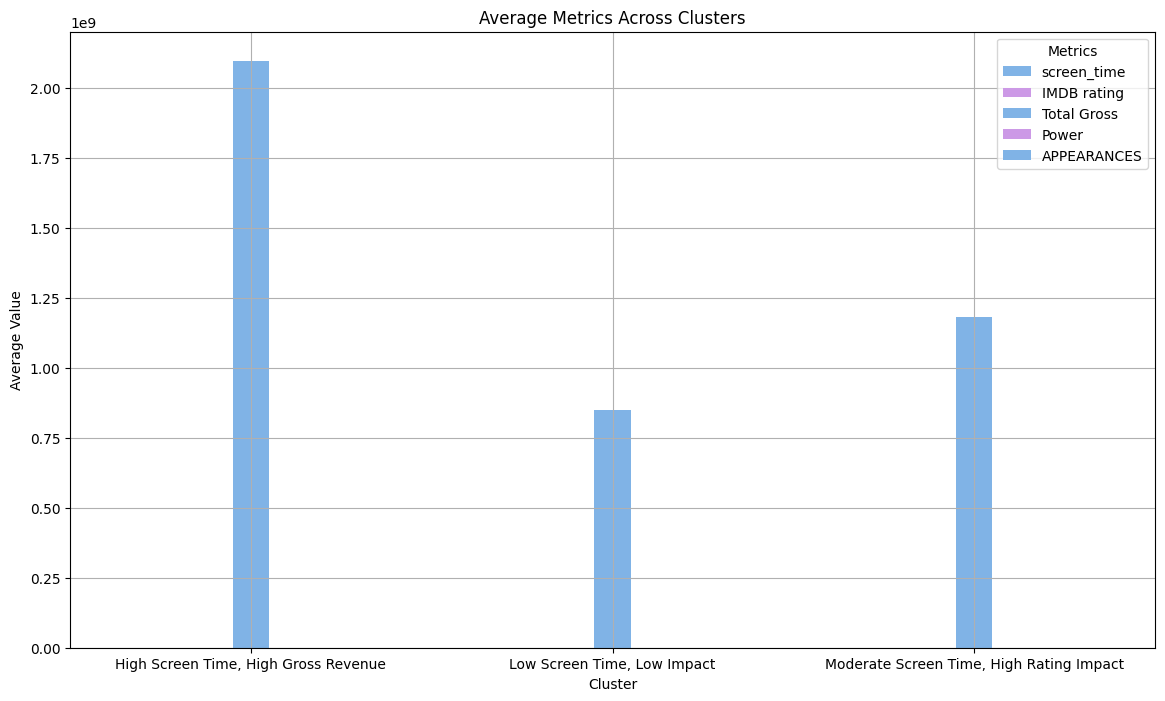

Top Characters in Cluster 0 (Low Screen Time, Low Impact):
                           Name  Impact_Score  screen_time  IMDB rating  \
105               Dr. Helen Cho  5.611224e+08       3.2500        7.300   
65   Col. James "Rhodey" Rhodes  5.558038e+08       4.5000        7.480   
107               Ulysses Klauë  5.499438e+08       5.0000        7.300   
83                 Peggy Carter  5.434041e+08       1.0625        7.675   
25         Harold "Happy" Hogan  5.394963e+08       3.8750        7.800   

      Total Gross  
105  1.402806e+09  
65   1.389510e+09  
107  1.374860e+09  
83   1.358510e+09  
25   1.348741e+09  


Top Characters in Cluster 1 (High Screen Time, High Gross Revenue):
                      Name  Impact_Score  screen_time  IMDB rating  \
187  James "Rhodey" Rhodes  1.119001e+09         9.25          8.4   
188           Morgan Stark  1.119001e+09         3.25          8.4   
189                Akihiko  1.119001e+09         1.25          8.4   
190     Agent Brock 

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_56988/764130640.py:92: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




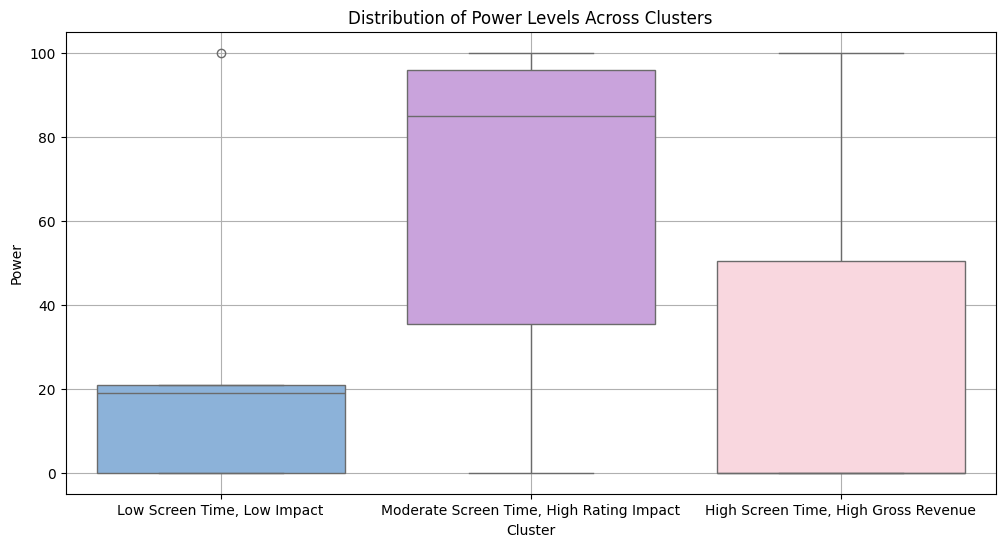

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_56988/764130640.py:101: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



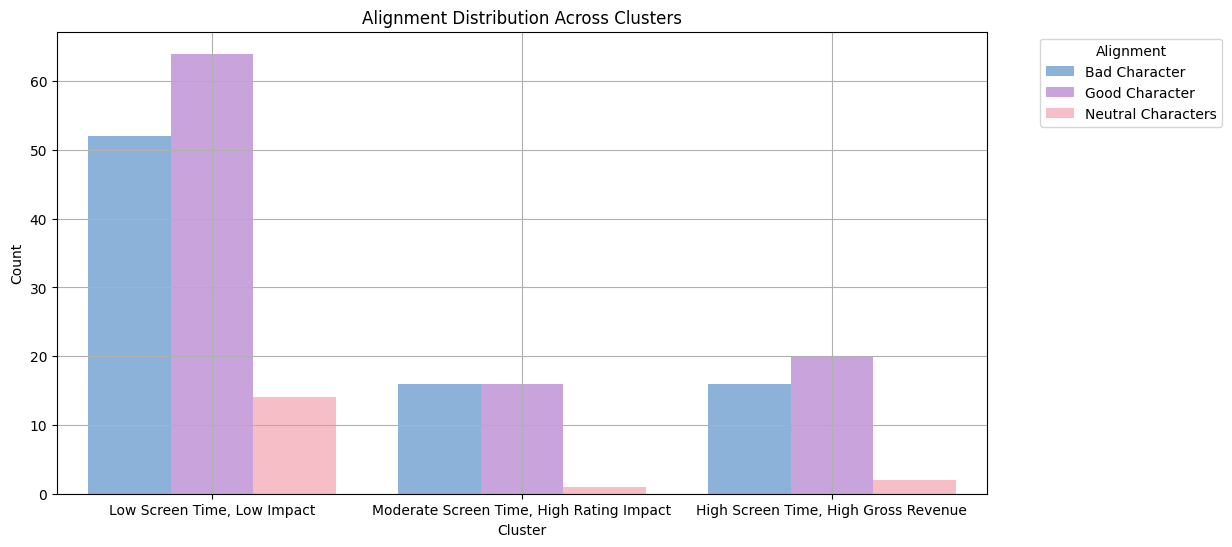

Top Characters in 'High Screen Time, High Gross Revenue' Cluster:
                      Name  Power  APPEARANCES  Impact_Score  screen_time  \
187  James "Rhodey" Rhodes    NaN        525.0  1.119001e+09         9.25   
188           Morgan Stark    NaN         29.0  1.119001e+09         3.25   
189                Akihiko    NaN        189.0  1.119001e+09         1.25   
190     Agent Brock Rumlow    NaN        126.0  1.119001e+09         0.75   
191          Cooper Barton    NaN       1394.0  1.119001e+09         0.75   

     IMDB rating   Total Gross  
187          8.4  2.797501e+09  
188          8.4  2.797501e+09  
189          8.4  2.797501e+09  
190          8.4  2.797501e+09  
191          8.4  2.797501e+09  
Outliers in the First Cluster:
                Name  Impact_Score  screen_time  IMDB rating   Total Gross
28    Dr. Betty Ross  1.059084e+08         27.0          6.6  2.647710e+08
174    Carol Danvers  7.851552e+08         35.5          7.6  1.962888e+09
175  Agent Nick F

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_56988/764130640.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_56988/764130640.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_56988/764130640.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example DataFrames
# Replace these with your actual DataFrames

# Helper function for pastel shades
def pastel_shade(base_color):
    if base_color == "blue":
        return (0.5, 0.7, 0.9)  # Pastel blue
    elif base_color == "purple":
        return (0.8, 0.6, 0.9)  # Pastel purple

# ---------------- Step 1: Merge DataFrames ---------------- #
# Merge screen time and movie data for clustering
character_analysis = merged_df.copy()

# Merge character traits
# character_analysis = character_analysis.merge(characters_df[['Character_ID', 'Name', 'Alignment', 'Power', 'APPEARANCES']], on='Character_ID')

# ---------------- Step 2: Prepare Data for Clustering ---------------- #
# Group by Character_ID to calculate average metrics
clustering_data = character_analysis.groupby('Character_ID')[['screen_time', 'IMDB rating', 'Total Gross', 'Budget_df1']].mean()

# Standardize the data for clustering
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Add descriptive labels to clusters
cluster_means = clustering_data.groupby('Cluster').mean()
cluster_labels = {
    0: 'Low Screen Time, Low Impact',
    1: 'High Screen Time, High Gross Revenue',
    2: 'Moderate Screen Time, High Rating Impact'
}
clustering_data['Cluster_Label'] = clustering_data['Cluster'].map(cluster_labels)

# Merge cluster labels back into the detailed data
clustering_data = clustering_data.reset_index()
clustering_data = clustering_data.merge(characters_df[['Character_ID', 'Name', 'Alignment', 'Power', 'APPEARANCES']], on='Character_ID')

# ---------------- Step 3: Profile Characters in Each Cluster ---------------- #
# Summarize key traits for each cluster
for cluster, group in clustering_data.groupby('Cluster'):
    print(f"Cluster {cluster}: {cluster_labels[cluster]}")
    print(f"Number of characters: {len(group)}")
    print(f"Average Power: {group['Power'].mean():.2f}")
    print(f"Average Appearances: {group['APPEARANCES'].mean():.2f}")
    print(f"Alignment distribution:\n{group['Alignment'].value_counts()}")
    print("\n")

# ---------------- Step 4: Visualize Key Metrics Across Clusters ---------------- #
# Calculate average metrics for each cluster
cluster_summary = clustering_data.groupby('Cluster_Label')[['screen_time', 'IMDB rating', 'Total Gross', 'Power', 'APPEARANCES']].mean()

# Bar plot for average metrics
cluster_summary.plot(kind='bar', figsize=(14, 8), color=[pastel_shade('blue'), pastel_shade('purple')])
plt.title('Average Metrics Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(title='Metrics')
plt.xticks(rotation=0)
plt.grid()
plt.show()

# ---------------- Step 5: Identify Most Influential Characters ---------------- #
# Calculate an impact score for each character
clustering_data['Impact_Score'] = (
    clustering_data['IMDB rating'] * 0.4 +
    clustering_data['Total Gross'] * 0.4 +
    clustering_data['screen_time'] * 0.2
)

# Find top characters in each cluster
for cluster, group in clustering_data.groupby('Cluster'):
    top_characters = group.sort_values('Impact_Score', ascending=False).head(5)
    print(f"Top Characters in Cluster {cluster} ({cluster_labels[cluster]}):")
    print(top_characters[['Name', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])
    print("\n")

# ---------------- Step 6: Visualize Distribution of Traits ---------------- #
# Distribution of Power Levels Across Clusters
plt.figure(figsize=(12, 6))
sns.boxplot(data=clustering_data, x='Cluster_Label', y='Power', palette=[pastel_shade('blue'), pastel_shade('purple'),random_pink_shade()])
plt.title('Distribution of Power Levels Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Power')
plt.grid()
plt.show()

# Alignment Distribution Across Clusters
plt.figure(figsize=(12, 6))
sns.countplot(data=clustering_data, x='Cluster_Label', hue='Alignment', palette=[pastel_shade('blue'), pastel_shade('purple'),random_pink_shade(), purple_shade,"blue"])
plt.title('Alignment Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Alignment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# ---------------- Step 7: Drill Down Into Specific Characters ---------------- #
# Filter for a specific cluster
high_gross_cluster = clustering_data[clustering_data['Cluster_Label'] == 'High Screen Time, High Gross Revenue']

# Display detailed information about the top characters
top_high_gross_characters = high_gross_cluster.sort_values('Impact_Score', ascending=False).head(5)
print("Top Characters in 'High Screen Time, High Gross Revenue' Cluster:")
print(top_high_gross_characters[['Name', 'Power', 'APPEARANCES', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])

# ---------------- Step 8: Save Results to a File ---------------- #
# Save detailed clustering results to a CSV
clustering_data.to_csv('character_clustering_results.csv', index=False)

from scipy.stats import zscore

# Filter data for the first cluster
first_cluster = clustering_data[clustering_data['Cluster'] == 2]

# Metrics to analyze
metrics = ['Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']

# Calculate Z-scores for each metric
for metric in metrics:
    first_cluster[f'{metric}_zscore'] = zscore(first_cluster[metric])

# Define outliers as those with Z-scores > 2 or < -2
outliers = first_cluster[(first_cluster[[f'{metric}_zscore' for metric in metrics]].abs() > 2).any(axis=1)]

print("Outliers in the First Cluster:")
print(outliers[['Name', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])





Cluster 0: Cluster 0: Low Gross Revenue
Number of characters: 130
Average Power: 28.00
Average Screen Time: 4.48
Alignment distribution:
Alignment
Good Character        64
Bad Character         52
Neutral Characters    14
Name: count, dtype: int64


Cluster 1: Cluster 1: Moderate Screen Time, High Revenue
Number of characters: 38
Average Power: 28.71
Average Screen Time: 4.60
Alignment distribution:
Alignment
Good Character        20
Bad Character         16
Neutral Characters     2
Name: count, dtype: int64


Cluster 2: Cluster 2: High Screen Time, High Rating Impact
Number of characters: 33
Average Power: 64.00
Average Screen Time: 19.52
Alignment distribution:
Alignment
Bad Character         16
Good Character        16
Neutral Characters     1
Name: count, dtype: int64



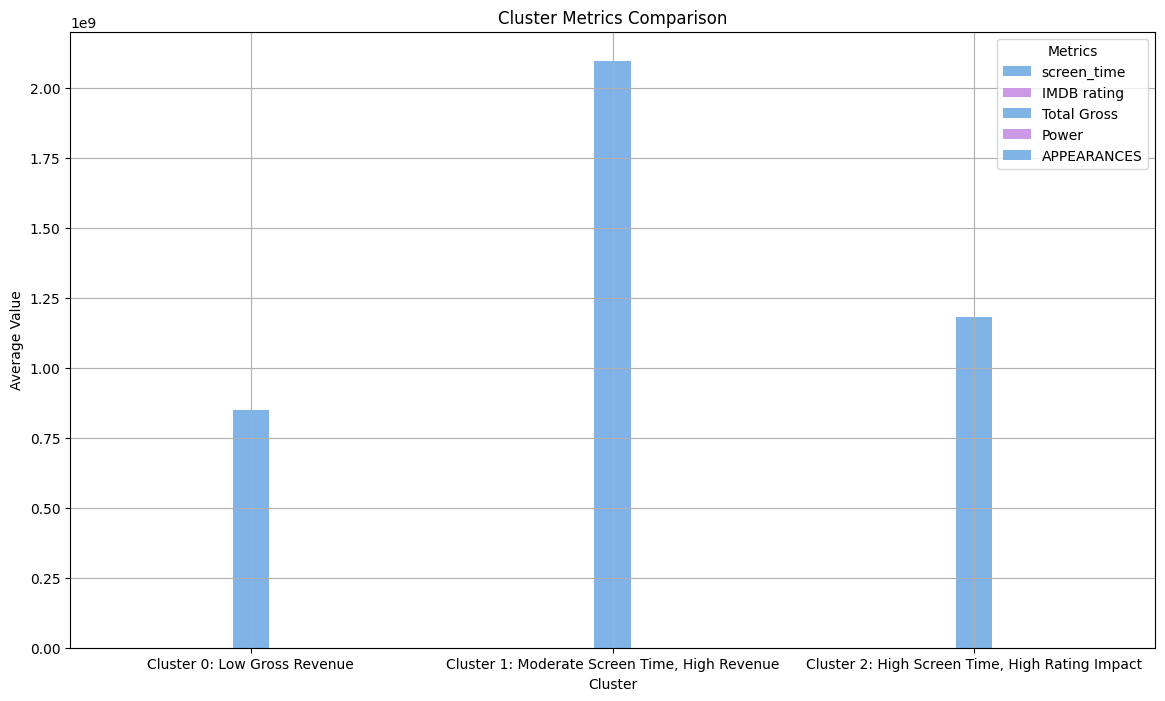


Top Characters in Cluster 0 (Cluster 0: Low Gross Revenue):
                           Name  Impact_Score  screen_time  IMDB rating  \
105               Dr. Helen Cho  5.611224e+08       3.2500        7.300   
65   Col. James "Rhodey" Rhodes  5.558038e+08       4.5000        7.480   
107               Ulysses Klauë  5.499438e+08       5.0000        7.300   
83                 Peggy Carter  5.434041e+08       1.0625        7.675   
25         Harold "Happy" Hogan  5.394963e+08       3.8750        7.800   

      Total Gross  
105  1.402806e+09  
65   1.389510e+09  
107  1.374860e+09  
83   1.358510e+09  
25   1.348741e+09  

Top Characters in Cluster 1 (Cluster 1: Moderate Screen Time, High Revenue):
                      Name  Impact_Score  screen_time  IMDB rating  \
187  James "Rhodey" Rhodes  1.119001e+09         9.25          8.4   
188           Morgan Stark  1.119001e+09         3.25          8.4   
189                Akihiko  1.119001e+09         1.25          8.4   
190     Ag

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_56988/1772753.py:83: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_56988/1772753.py:86: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8m/h43kc7jn5n1bpd8cqfcz8mnr0000gn/T/ipykernel_56988/1772753.py:86: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [716]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np

# ---------------- Step 1: Merge DataFrames ---------------- #
# Example DataFrame setup (replace with your actual DataFrame)
character_analysis = merged_df.copy()

# ---------------- Step 2: Prepare Data for Clustering ---------------- #
# Group by Character_ID to calculate average metrics
clustering_data = character_analysis.groupby('Character_ID')[['screen_time', 'IMDB rating', 'Total Gross', 'Budget_df1']].mean()

# Standardize the data for clustering
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Calculate cluster means to reassess labels
cluster_means = clustering_data.groupby('Cluster').mean()

# Reassess labels based on actual data
cluster_labels = {
    0: 'Cluster 0: Low Gross Revenue',
    1: 'Cluster 1: Moderate Screen Time, High Revenue',
    2: 'Cluster 2: High Screen Time, High Rating Impact'
}
clustering_data['Cluster_Label'] = clustering_data['Cluster'].map(cluster_labels)

# Merge cluster labels back into the detailed data
clustering_data = clustering_data.reset_index()
clustering_data = clustering_data.merge(characters_df[['Character_ID', 'Name', 'Alignment', 'Power', 'APPEARANCES']], on='Character_ID')

# ---------------- Step 3: Analyze and Profile Clusters ---------------- #
# Summarize traits for each cluster
for cluster, group in clustering_data.groupby('Cluster'):
    print(f"\nCluster {cluster}: {cluster_labels[cluster]}")
    print(f"Number of characters: {len(group)}")
    print(f"Average Power: {group['Power'].mean():.2f}")
    print(f"Average Screen Time: {group['screen_time'].mean():.2f}")
    print(f"Alignment distribution:\n{group['Alignment'].value_counts()}\n")

# ---------------- Step 4: Visualize Metrics Across Clusters ---------------- #
# Visualize average metrics per cluster
cluster_summary = clustering_data.groupby('Cluster_Label')[['screen_time', 'IMDB rating', 'Total Gross', 'Power', 'APPEARANCES']].mean()

# Bar plot for cluster metrics
cluster_summary.plot(kind='bar', figsize=(14, 8), color=[(0.5, 0.7, 0.9), (0.8, 0.6, 0.9)])
plt.title('Cluster Metrics Comparison')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(title='Metrics')
plt.xticks(rotation=0)
plt.grid()
plt.show()

# ---------------- Step 5: Identify Most Impactful Characters ---------------- #
# Refine the impact score calculation
clustering_data['Impact_Score'] = (
    clustering_data['IMDB rating'] * 0.5 +
    clustering_data['Total Gross'] * 0.4 +
    clustering_data['screen_time'] * 0.1
)

# Display top characters in each cluster
for cluster, group in clustering_data.groupby('Cluster'):
    top_characters = group.sort_values('Impact_Score', ascending=False).head(5)
    print(f"\nTop Characters in Cluster {cluster} ({cluster_labels[cluster]}):")
    print(top_characters[['Name', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])

# ---------------- Step 6: Detect Outliers ---------------- #
# Focus on a specific cluster to detect outliers
specific_cluster = clustering_data[clustering_data['Cluster'] == 2]  # Example: High Screen Time Cluster

# Calculate Z-scores
metrics = ['Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']
specific_cluster[metrics] = specific_cluster[metrics].apply(pd.to_numeric, errors='coerce').dropna()

for metric in metrics:
    specific_cluster[f'{metric}_zscore'] = zscore(specific_cluster[metric])

# Identify outliers based on Z-score thresholds
outlier_threshold = 2
outliers = specific_cluster[(specific_cluster[[f'{metric}_zscore' for metric in metrics]].abs() > outlier_threshold).any(axis=1)]

print("\nOutliers in the High Screen Time, High Rating Impact Cluster:")
print(outliers[['Name', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])


In [717]:
# Focus on a specific cluster (e.g., High Screen Time, High Rating Impact)
specific_cluster = clustering_data[clustering_data['Cluster_Label'] == 'High Screen Time, High Rating Impact'].copy()

# Metrics to analyze
metrics = ['Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']

# Ensure metrics are numeric and handle missing values
specific_cluster[metrics] = specific_cluster[metrics].apply(pd.to_numeric, errors='coerce').dropna()

# Sort by Impact Score to find the top characters
top_characters = specific_cluster.sort_values('Impact_Score', ascending=False).head(5)

print("Top Characters in the High Screen Time, High Rating Impact Cluster:")
print(top_characters[['Name', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])


Top Characters in the High Screen Time, High Rating Impact Cluster:
Empty DataFrame
Columns: [Name, Impact_Score, screen_time, IMDB rating, Total Gross]
Index: []


##### correct

In [711]:
from scipy.stats import zscore

merged_df.to_csv("Data/OOff.csv")
# Set screen time threshold (e.g., only consider characters with >10 minutes)
screen_time_threshold = 5
filtered_cluster = first_cluster[first_cluster['screen_time'] > screen_time_threshold].copy()

# Metrics to analyze
metrics = ['Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']

# Validate that metrics are numeric and handle missing values
filtered_cluster[metrics] = filtered_cluster[metrics].apply(pd.to_numeric, errors='coerce')
filtered_cluster = filtered_cluster.dropna(subset=metrics)

# Check summary before computing Z-scores
print("Filtered Cluster Metrics Summary:")
print(filtered_cluster[metrics].describe())

# Calculate Z-scores for each metric and add as new columns
for metric in metrics:
    zscore_column = f'{metric}_zscore'
    filtered_cluster[zscore_column] = zscore(filtered_cluster[metric])

# Define outliers as rows where any Z-score exceeds a threshold
outlier_threshold = 10
zscore_columns = [f'{metric}_zscore' for metric in metrics]
outliers = filtered_cluster[(filtered_cluster[zscore_columns].abs() > outlier_threshold).any(axis=1)]

# Display outliers
print("\nOutliers in the Filtered Cluster (Screen Time > 10 minutes):")
print(outliers[['Name', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])

# Define function for filtering by screen time and detecting outliers
def analyze_outliers(cluster, threshold):
    filtered = cluster[cluster['screen_time'] > threshold].copy()
    for metric in metrics:
        filtered[f'{metric}_zscore'] = zscore(filtered[metric])
    zscore_columns = [f'{metric}_zscore' for metric in metrics]
    outliers = filtered[(filtered[zscore_columns].abs() > 2).any(axis=1)]
    return outliers

# Experiment with thresholds
thresholds = [5, 10, 15]
for t in thresholds:
    print(f"\nOutliers with Screen Time > {t} minutes:")
    result = analyze_outliers(first_cluster, t)
    print(result[['Name', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])

    result


KeyError: "['Impact_Score'] not in index"

In [729]:
from scipy.stats import zscore

# Filter data for the first cluster
first_cluster = clustering_data[clustering_data['Cluster'] == 2].copy()

# Metrics to analyze
metrics = ['Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']

# Validate that metrics are numeric and handle missing values
first_cluster[metrics] = first_cluster[metrics].apply(pd.to_numeric, errors='coerce')
first_cluster = first_cluster.dropna(subset=metrics)

# Check summary before computing Z-scores
print("First Cluster Metrics Summary:")
print(first_cluster[metrics].describe())

# Calculate Z-scores for each metric and add as new columns
for metric in metrics:
    zscore_column = f'{metric}_zscore'
    first_cluster[zscore_column] = zscore(first_cluster[metric])

# Define outliers as rows where any Z-score exceeds a threshold
outlier_threshold = 2
zscore_columns = [f'{metric}_zscore' for metric in metrics]
outliers = first_cluster[(first_cluster[zscore_columns].abs() > outlier_threshold).any(axis=1)]

# Display outliers
print("\nOutliers in the First Cluster:")
print(outliers[['Name', 'Impact_Score', 'screen_time', 'IMDB rating', 'Total Gross']])


KeyError: "['Impact_Score'] not in index"

#### All



In [623]:

# ---------------- Question 1: Connection between Year and Number of GM Characters ----------------

# # Counting the number of unique characters per year
characters_per_year = characters_df.groupby('Release_Year')['Character_ID'].nunique()

# Bar Plot: Number of GM Characters per Year
plt.figure(figsize=(10, 6))
sns.barplot(x=characters_per_year.index, y=characters_per_year.values, palette=my_palette(characters_per_year.index.tolist()))
plt.title('Number of GM Characters per Year', fontsize=14, color="black")
plt.xlabel('Year', fontsize=12, color="black")
plt.ylabel('Number of Characters', fontsize=12, color="black")
plt.xticks(rotation=45, color="black")
plt.yticks(color="black", fontsize=8)
plt.show()

# Line Plot: Evolution of GM Characters over Years
plt.figure(figsize=(10, 6))
plt.plot(characters_per_year.index, characters_per_year.values, marker='o', linestyle='-', color=purple_shade)
plt.title('Evolution of GM Characters Over the Years', fontsize=14, color="black")
plt.xlabel('Year', fontsize=12, color="black")
plt.ylabel('Number of Characters', fontsize=12, color="black")
plt.grid()
plt.xticks(color="black", fontsize=10)
plt.yticks(color="black", fontsize=7)
plt.show()

# ---------------- Question 2: Connection Between Power Features and Gender ----------------

_df = characters_df[characters_df['Gender'] != '-']

# # Box Plot: Distribution of power features by gender
for feature in ['Speed', 'Strength', 'Intelligence_x', 'Durability_x', 'Combat']:  # Column names adjusted
    plt.figure(figsize=(10, 9))
    sns.boxplot(data=_df, x='Gender', y=feature, palette=[blue_shade, purple_shade])
    plt.title(f'Distribution of {feature} by Gender', fontsize=14, color="black")
    plt.xlabel('Gender', fontsize=12, color="black")
    plt.ylabel(feature, fontsize=12, color="black")
    plt.yticks(color="black", fontsize=8)
    plt.xticks(rotation=90, color="black")
    plt.show()

# # Violin Plot: Density and distribution of power features by gender
# for feature in ['Speed', 'Strength', 'Intelligence_x', 'Durability_x', 'Combat']:  # Column names adjusted
    plt.figure(figsize=(10, 9))
    sns.violinplot(data=_df, x='Gender', y=feature, palette=[blue_shade, purple_shade])
    plt.title(f'Violin Plot of {feature} by Gender', fontsize=14, color="black")
    plt.xlabel('Gender', fontsize=12, color="black")
    plt.ylabel(feature, fontsize=12, color="black")
    plt.xticks(color="black")
    plt.yticks(color="black", fontsize=8)
    plt.show()


# Filter the data to exclude rows where Gender is "-"
filtered_characters_df = characters_df[characters_df['Gender'] != '-']

# Select the relevant features and calculate the mean for each gender
power_features = ['Speed', 'Strength', 'Intelligence_x', 'Durability_x', 'Combat']
gender_means = filtered_characters_df.groupby('Gender')[power_features].mean()

# Reset the index for easier plotting
gender_means = gender_means.reset_index()

# Plotting the grouped bar plot
plt.figure(figsize=(12, 6))
gender_means_melted = gender_means.melt(id_vars='Gender', var_name='Feature', value_name='Average Value')

sns.barplot(data=gender_means_melted, x='Feature', y='Average Value', hue='Gender')
plt.title('Comparison of Power Features: Males vs. Females', fontsize=16)
plt.xlabel('Power Feature', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

# # ---------------- Question 3: Connection Between Superpowers and Appearances ----------------

# Bar Plot: Average appearances by superpower status
plt.figure(figsize=(10, 9))
sns.barplot(data=_df, x='HasPower', y='APPEARANCES', palette=[blue_shade, purple_shade])
plt.title('Average Appearances by Superpower Status', fontsize=14, color="black")
plt.xlabel('Has Power', fontsize=12, color="black")
plt.ylabel('Average Appearances', fontsize=12, color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

# # Scatter Plot: Superpower level vs. appearances
# plt.figure(figsize=(10, 9))
# sns.scatterplot(data=characters_df, y='Power', x='APPEARANCES', hue='HasPower', palette=[blue_shade, purple_shade])
# plt.title('Superpower Level vs. Appearances', fontsize=14, color="black")
# plt.xlabel('Power', fontsize=12, color="black")
# plt.ylabel('Appearances', fontsize=12, color="black")
# plt.xticks(color="black")
# plt.yticks(color="black", fontsize=8)
# plt.show()

# ---------------- Question 4: Connection Between Villain Screen Time and Movie Success ----------------

# Filtering villains and merging with movie data for context
characters_imdb_df = pd.merge(characters_df, movies_df[["Movie_ID",'IMDB rating']], on="Movie_ID", how="inner")

villains = characters_df[characters_df['Alignment_x'] == 'Bad']  # Adjusted to match 'Alignment' column in Characters
villains.head()
# Scatter Plot: Screen time of villains vs. IMDB rating
plt.figure(figsize=(10, 9))
sns.scatterplot(data=villains, x='screen_time', y='	IMDB rating', hue='Phase', palette=[blue_shade, purple_shade])
plt.title('Villain Screen Time vs. IMDB Rating', fontsize=14, color="black")
plt.xlabel('Screen Time (minutes)', fontsize=12, color="black")
plt.ylabel('IMDB Rating', fontsize=12, color="black")
plt.xticks(color="black", rotation=90)
plt.yticks(color="black", fontsize=8)
plt.show()


KeyError: 'Release_Year'

###  PCA | Clustering

In [282]:

# Selecting power-related features for PCA
features = ['Speed', 'Strength', 'Intelligence_x', 'Durability_x', 'Combat']  # Adjusted column names
X = characters_df[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensions to 2
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Adding PCA components back to the DataFrame
characters_df['PCA1'] = X_pca[:, 0]
characters_df['PCA2'] = X_pca[:, 1]

# Plotting PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=characters_df, x='PCA1', y='PCA2', hue='Gender', palette=[blue_shade, purple_shade])
plt.title('PCA of Character Power Features', fontsize=14, color="black")
plt.xlabel('Principal Component 1', fontsize=12, color="black")
plt.ylabel('Principal Component 2', fontsize=12, color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

# What we are checking:
# - Whether characters cluster naturally based on power features.
# - If certain traits align with gender.
# What we can infer:
# - Insights into how power features combine and relate to each other in fewer dimensions.

# ---------------- Clustering: Grouping Similar Characters ----------------

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choosing 3 clusters
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the DataFrame
characters_df['Cluster'] = clusters

# Visualizing clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=characters_df, x='PCA1', y='PCA2', hue='Cluster', palette=my_palette', alpha=0.8)
plt.title('Clustering of Characters Based on Power Features', fontsize=14, color="black")
plt.xlabel('Principal Component 1', fontsize=12, color="black")
plt.ylabel('Principal Component 2', fontsize=12, color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

# What we are checking:
# - Whether characters group into distinct clusters based on power traits.
# - If there are natural divisions in character types (e.g., strong, fast, intelligent).
# What we can infer:
# - Archetypes of characters (e.g., "strong-fast," "weak-smart").
# - Identification of outliers or unique characters.

# ---------------- Clustering Movies ----------------

# Selecting features for movie clustering
movie_features = ['IMDB rating', 'Metascore', 'Budget_df1', 'Total Gross']  # Adjusted column names
movies_scaled = scaler.fit_transform(movies_df[movie_features])

# Applying KMeans clustering to group movies
kmeans_movies = KMeans(n_clusters=4, random_state=42)  # Choosing 4 clusters
movie_clusters = kmeans_movies.fit_predict(movies_scaled)

# Adding cluster labels to the movie DataFrame
movies_df['Cluster'] = movie_clusters

# Visualizing movie clusters
fig = px.scatter(
    movies_df,
    x='IMDB rating',
    y='Total Gross',
    color='Cluster',
    size='Budget_df1',
    title='Clustering of Movies Based on Success Metrics',
    labels={'IMDB rating': 'IMDB Rating', 'Total Gross': 'Total Gross ($)'},
    color_discrete_sequence=[
        f'rgb({blue_shade[0]*255}, {blue_shade[1]*255}, {blue_shade[2]*255})',
        f'rgb({purple_shade[0]*255}, {purple_shade[1]*255}, {purple_shade[2]*255})'
    ]
)
fig.show()

# What we are checking:
# - Whether movies cluster into distinct groups based on their success metrics.
# - If certain budget levels or ratings correlate with gross revenue.
# What we can infer:
# - Patterns of movie success (e.g., "high-budget, low-gross" vs. "low-budget, high-rating").
# - Insights into factors influencing financial and critical success.

# ---------------- Explanation of PCA and Clustering ----------------

# PCA Explanation:
# PCA reduces the number of dimensions while preserving as much variance as possible.
# In this case, we reduced the character power features to 2 dimensions (PCA1 and PCA2).
# This helps in visualizing relationships between characters and identifying patterns.

# Clustering Explanation:
# KMeans clustering groups similar entities (characters or movies) based on their features.
# For characters, we used power features to find natural groupings of character archetypes.
# For movies, we used metrics like IMDB rating, budget, and gross revenue to group movies into clusters of similar success profiles.


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values